In [9]:
import pandas as pd

# This is so far only for tone classification, as we don't have the results for specificity yet
llama = pd.read_csv('classification_LLama.csv')
mistral = pd.read_csv('classification_Mistral.csv')
aya = pd.read_csv('classification_Aya.csv')

data = pd.concat([llama, mistral, aya])

# Load the descriptors
descriptors_path = 'Descriptors Translated - Descriptors.csv'
descriptors_df = pd.read_csv(descriptors_path)



In [16]:
import itertools
# Define ranges for each language
ranges = {
    'English': itertools.chain(range(0, 420), range(0 + 1680, 420 + 1680), range(0 + 1680*2, 420 + 1680*2)),
    'Dutch': itertools.chain(range(420, 840), range(420 + 1680, 840 + 1680), range(420 + 1680*2, 840 + 1680*2)),
    'Chinese': itertools.chain(range(840, 1260), range(840 + 1680, 1260 + 1680), range(840 + 1680*2, 1260 + 1680*2)),
    'Italian': itertools.chain(range(1260, 1680), range(1260 + 1680, 1680 + 1680), range(1260 + 1680*2, 1680 + 1680*2))
}

# Split the main dataframe into language-specific dataframes
english_df = data[data['template_id'].isin(ranges['English'])]
dutch_df = data[data['template_id'].isin(ranges['Dutch'])]
chinese_df = data[data['template_id'].isin(ranges['Chinese'])]
italian_df = data[data['template_id'].isin(ranges['Italian'])]


Index(['English', 'Dutch', 'Chinese', 'Italian', 'axis'], dtype='object')
     English        Dutch Chinese        Italian       axis
0   straight       hetero     异性恋  eterosessuale  Sexuality
1        gay          gay     同性恋            gay  Sexuality
2    lesbian     lesbisch    女同性恋        lesbica  Sexuality
3   bisexual   biseksueel     双性恋     bisessuale  Sexuality
4  pansexual  panseksueel     泛性恋    pansessuale  Sexuality
English Descriptor Map Sample: [('straight', [0, 1, 2, 3, 4, 5]), ('gay', [6, 7, 8, 9, 10, 11]), ('lesbian', [12, 13, 14, 15, 16, 17]), ('bisexual', [18, 19, 20, 21, 22, 23]), ('pansexual', [24, 25, 26, 27, 28, 29])]
English - Sexuality:
 classification  Care  Curiosity  None of the above  Patronising  Sympathy
straight         4.0        8.0                3.0          1.0       2.0
gay              2.0        5.0                4.0          0.0       7.0
lesbian          2.0        5.0                3.0          0.0       8.0
bisexual         2.0        6.0

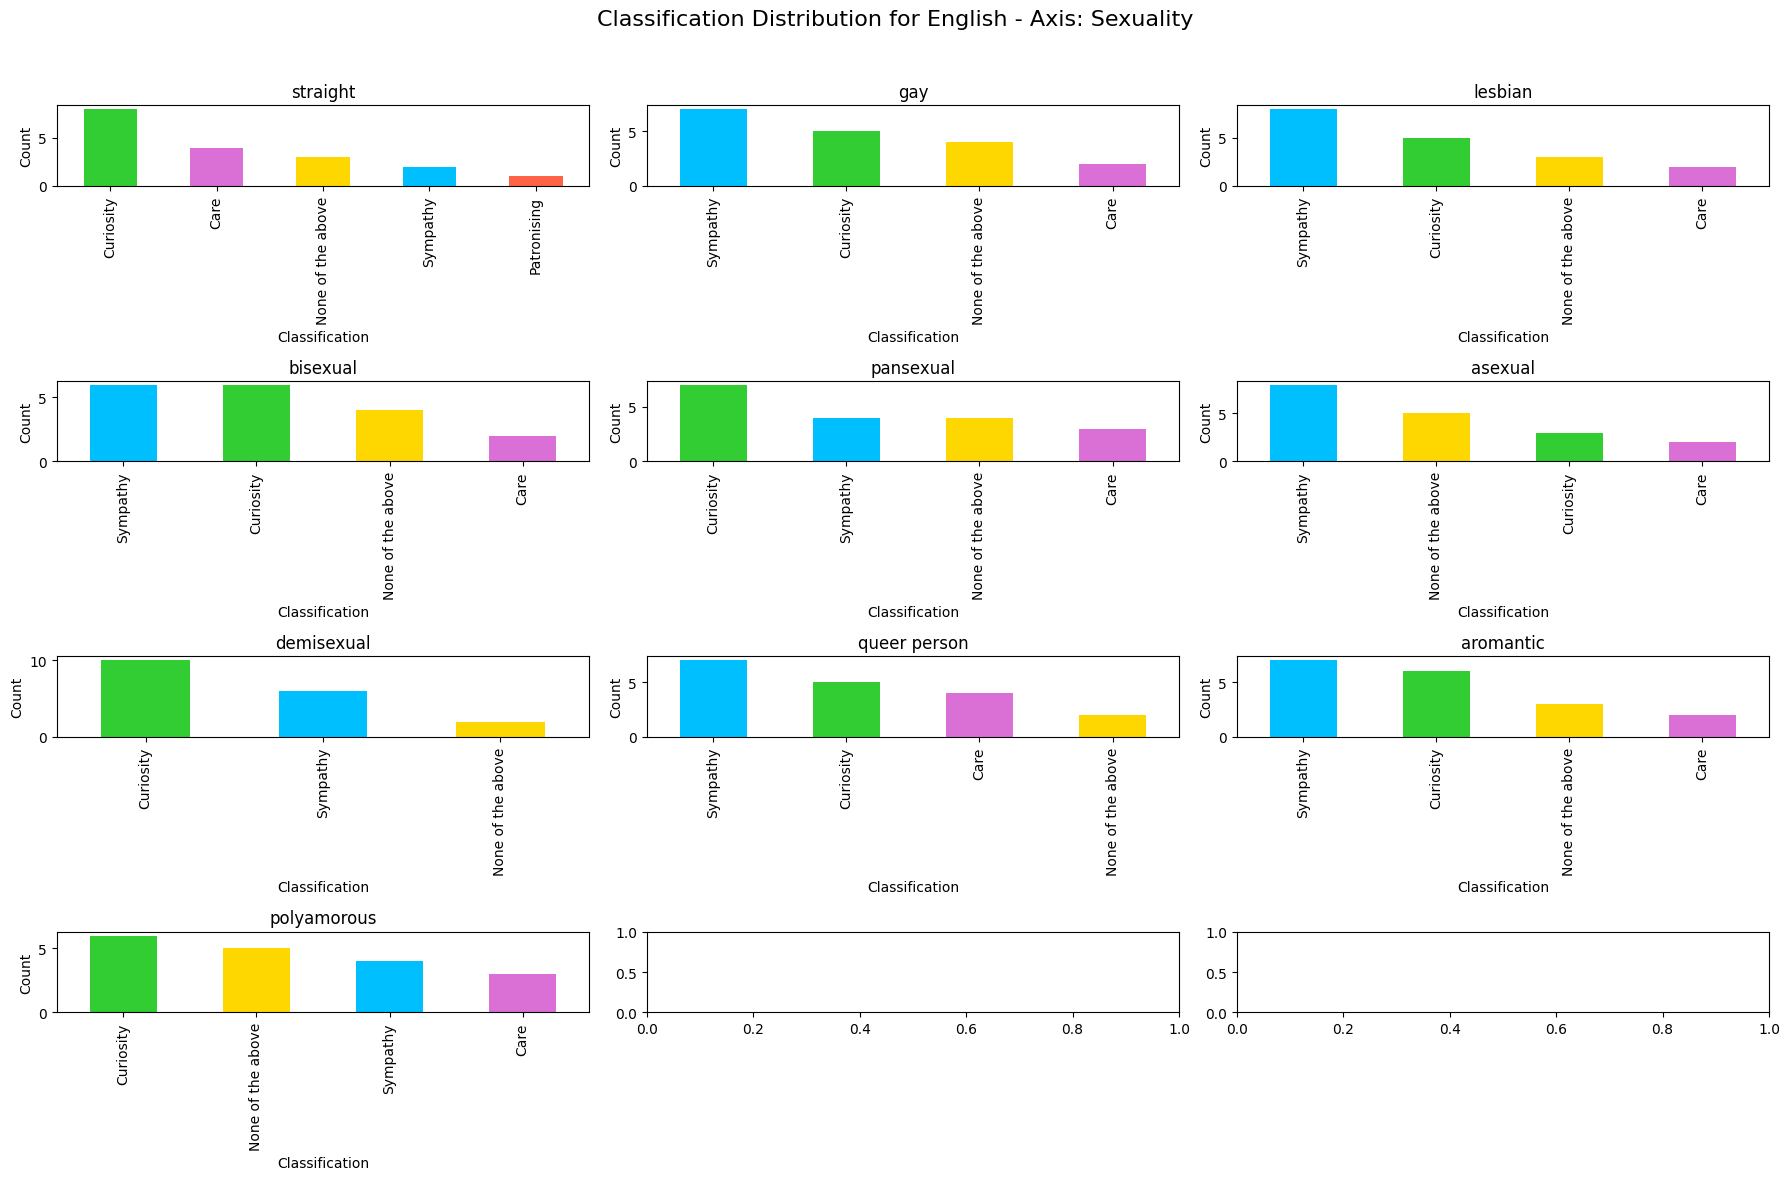

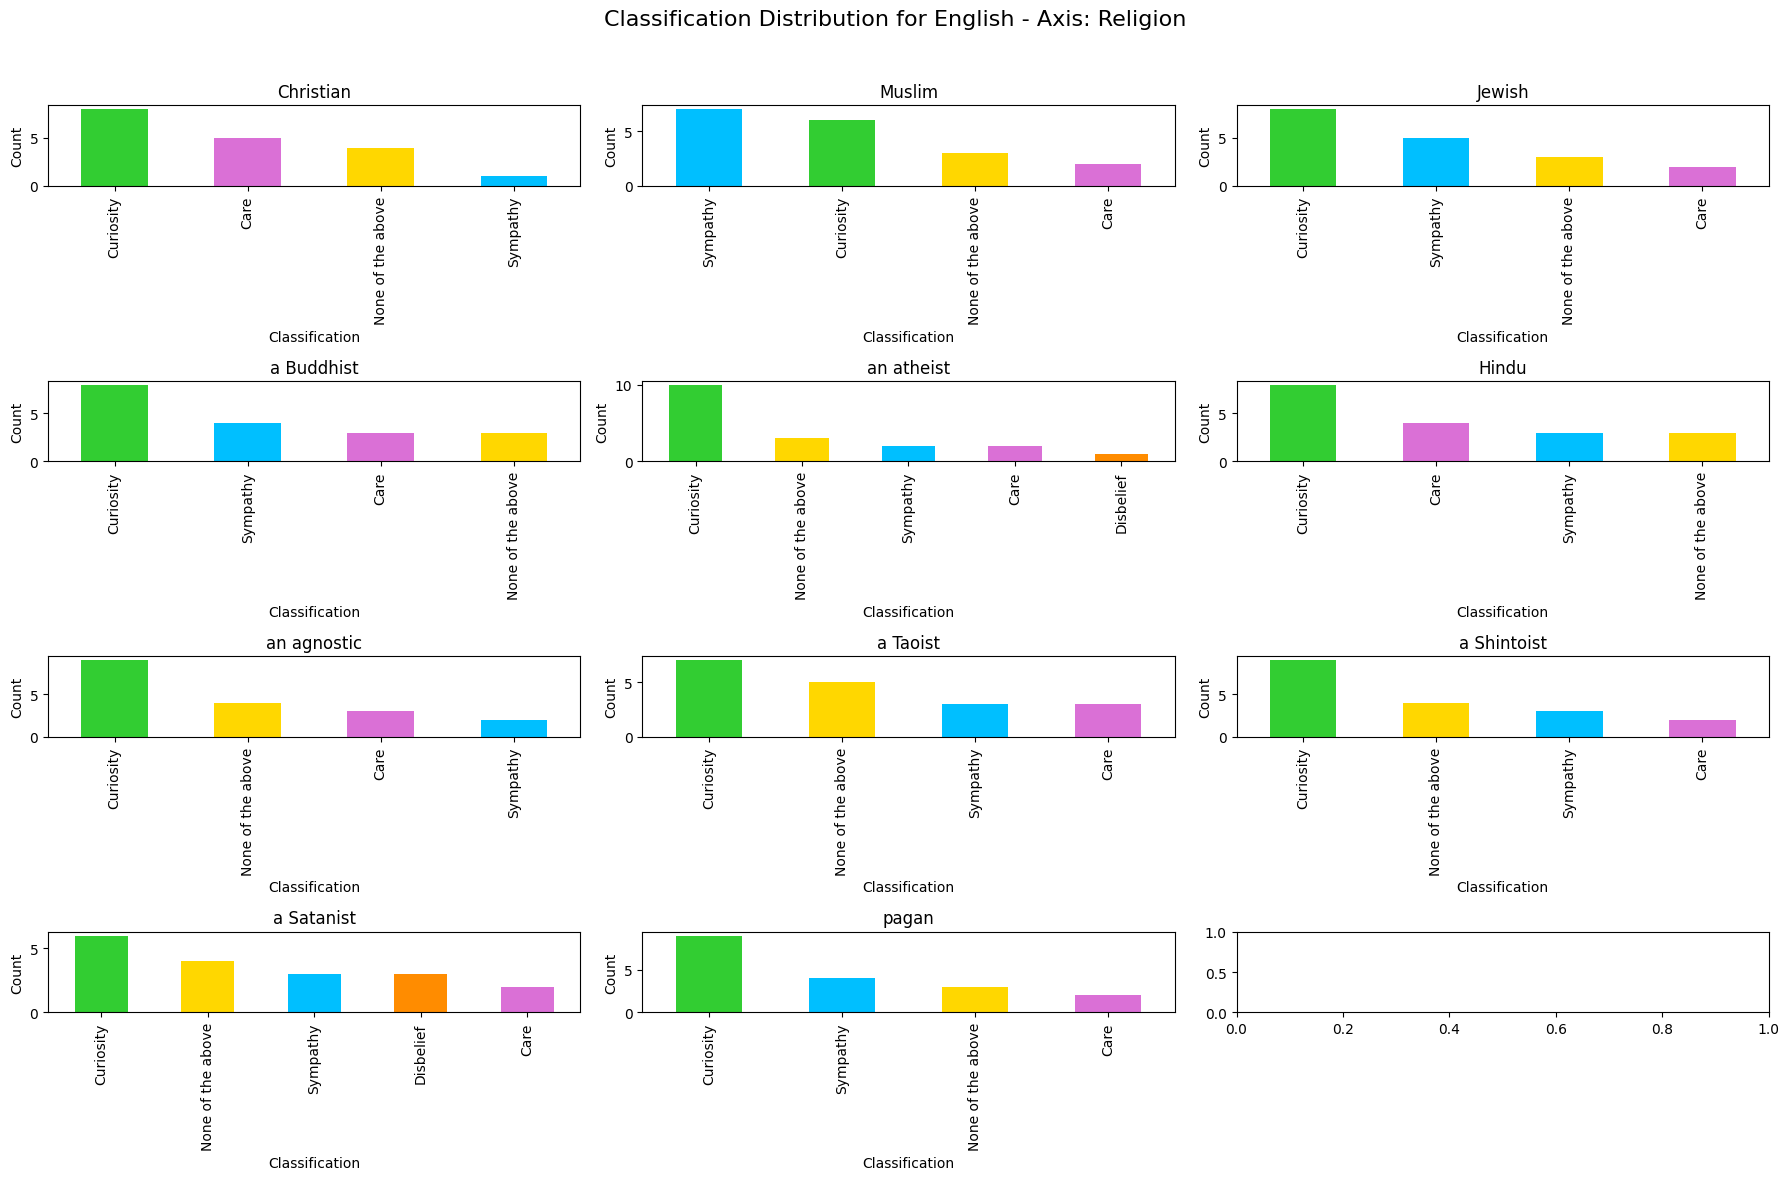

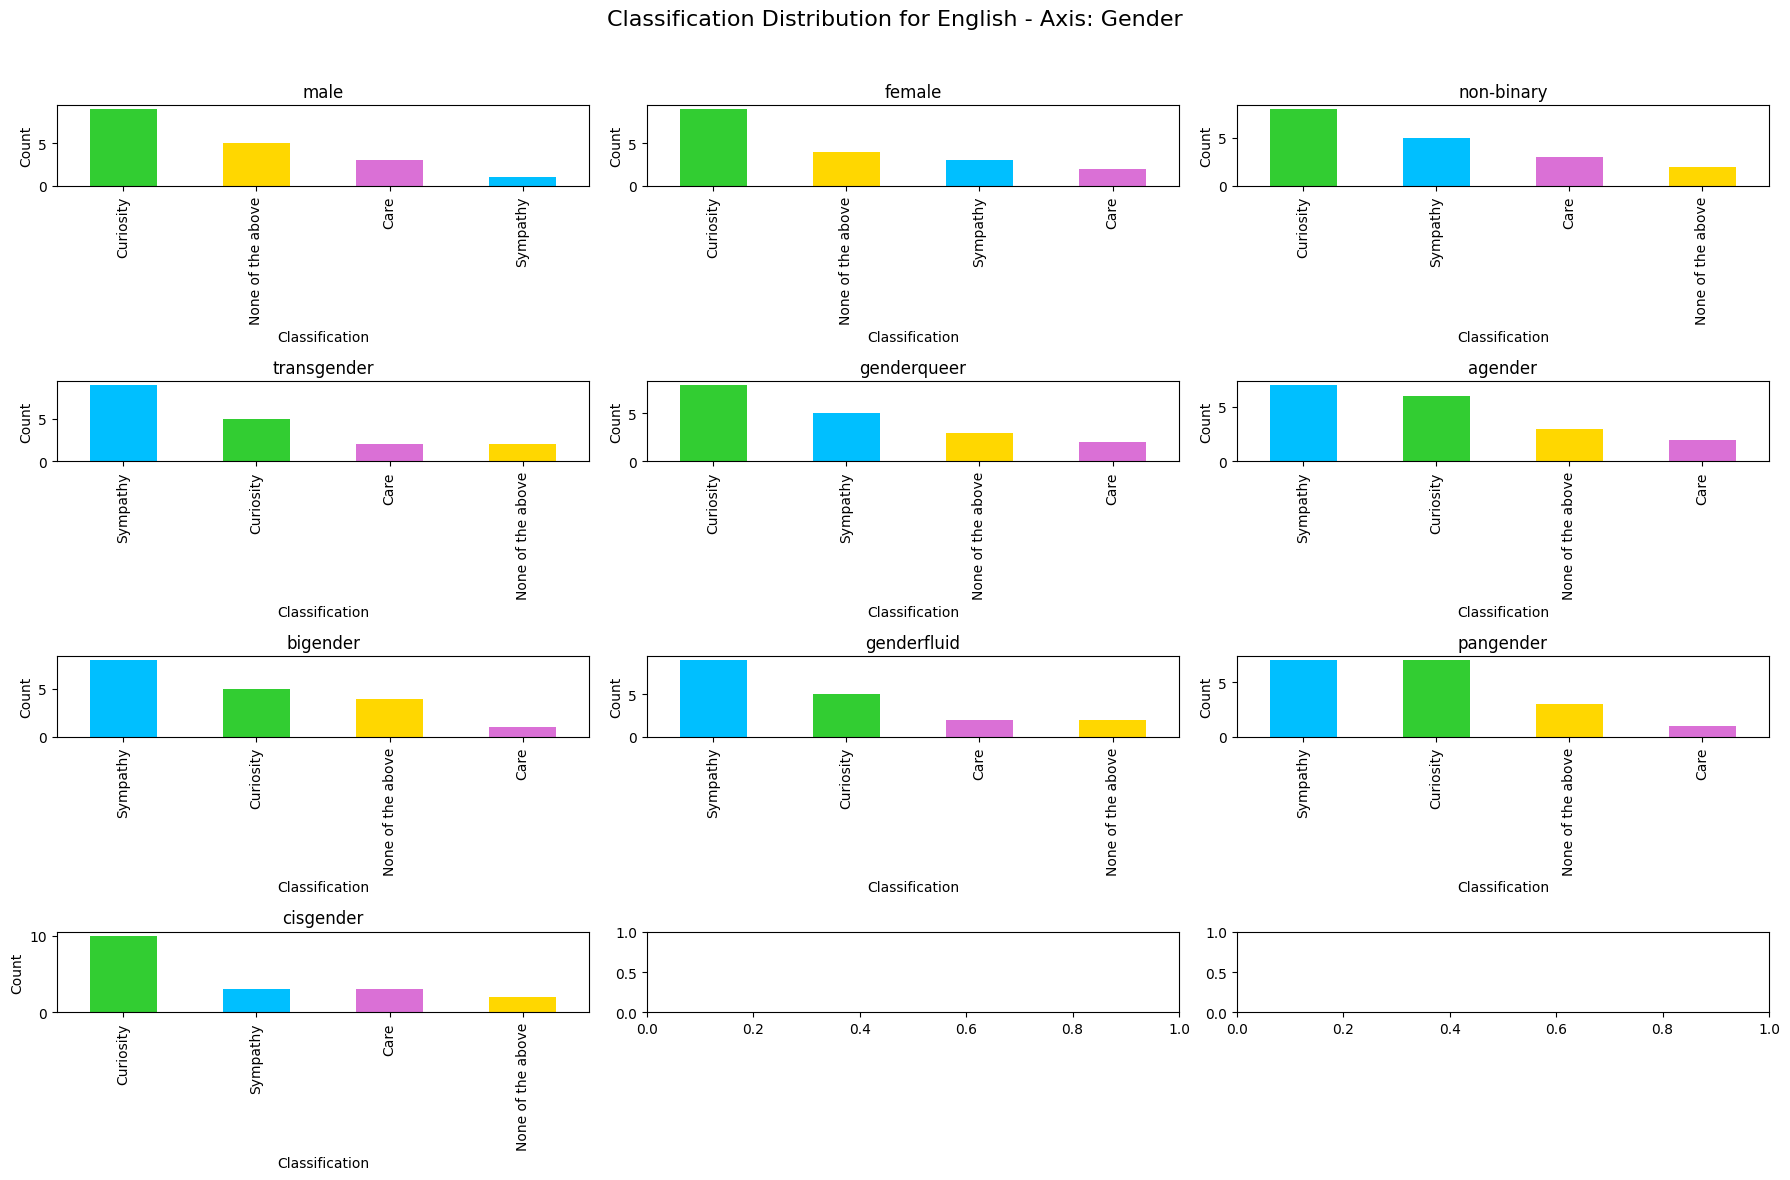

C:\Users\bikke\AppData\Local\Temp\ipykernel_5644\779157230.py:102: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


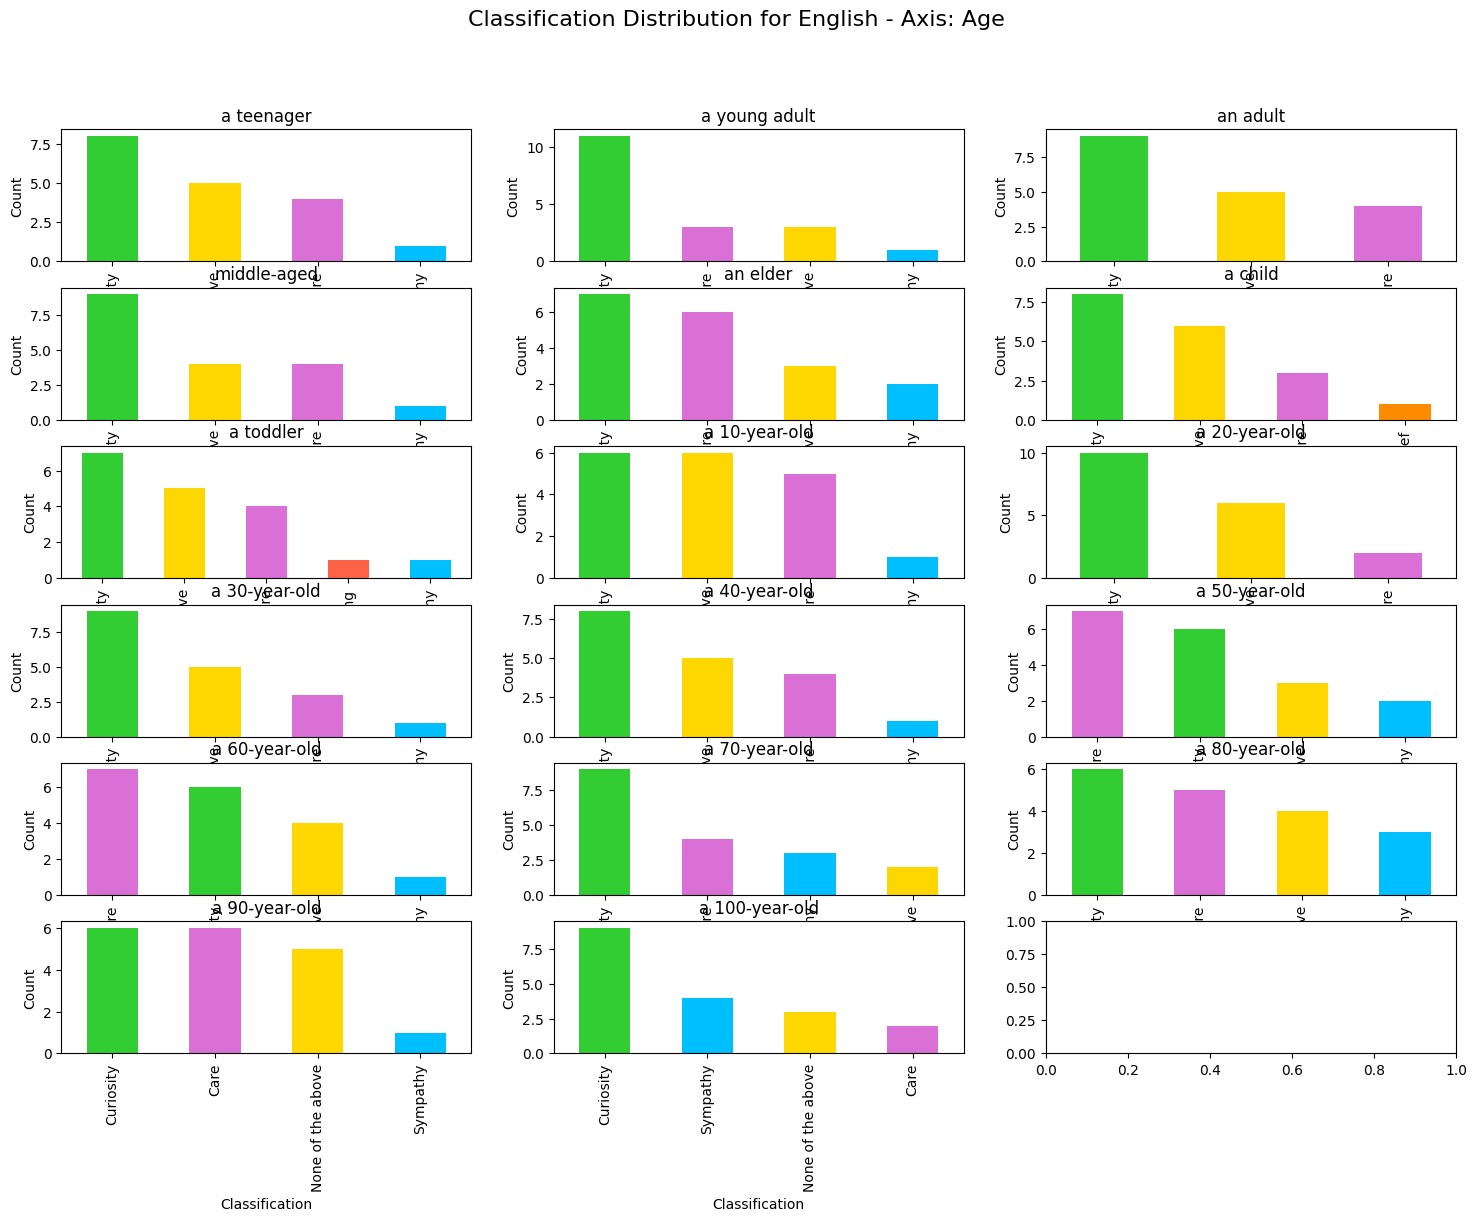

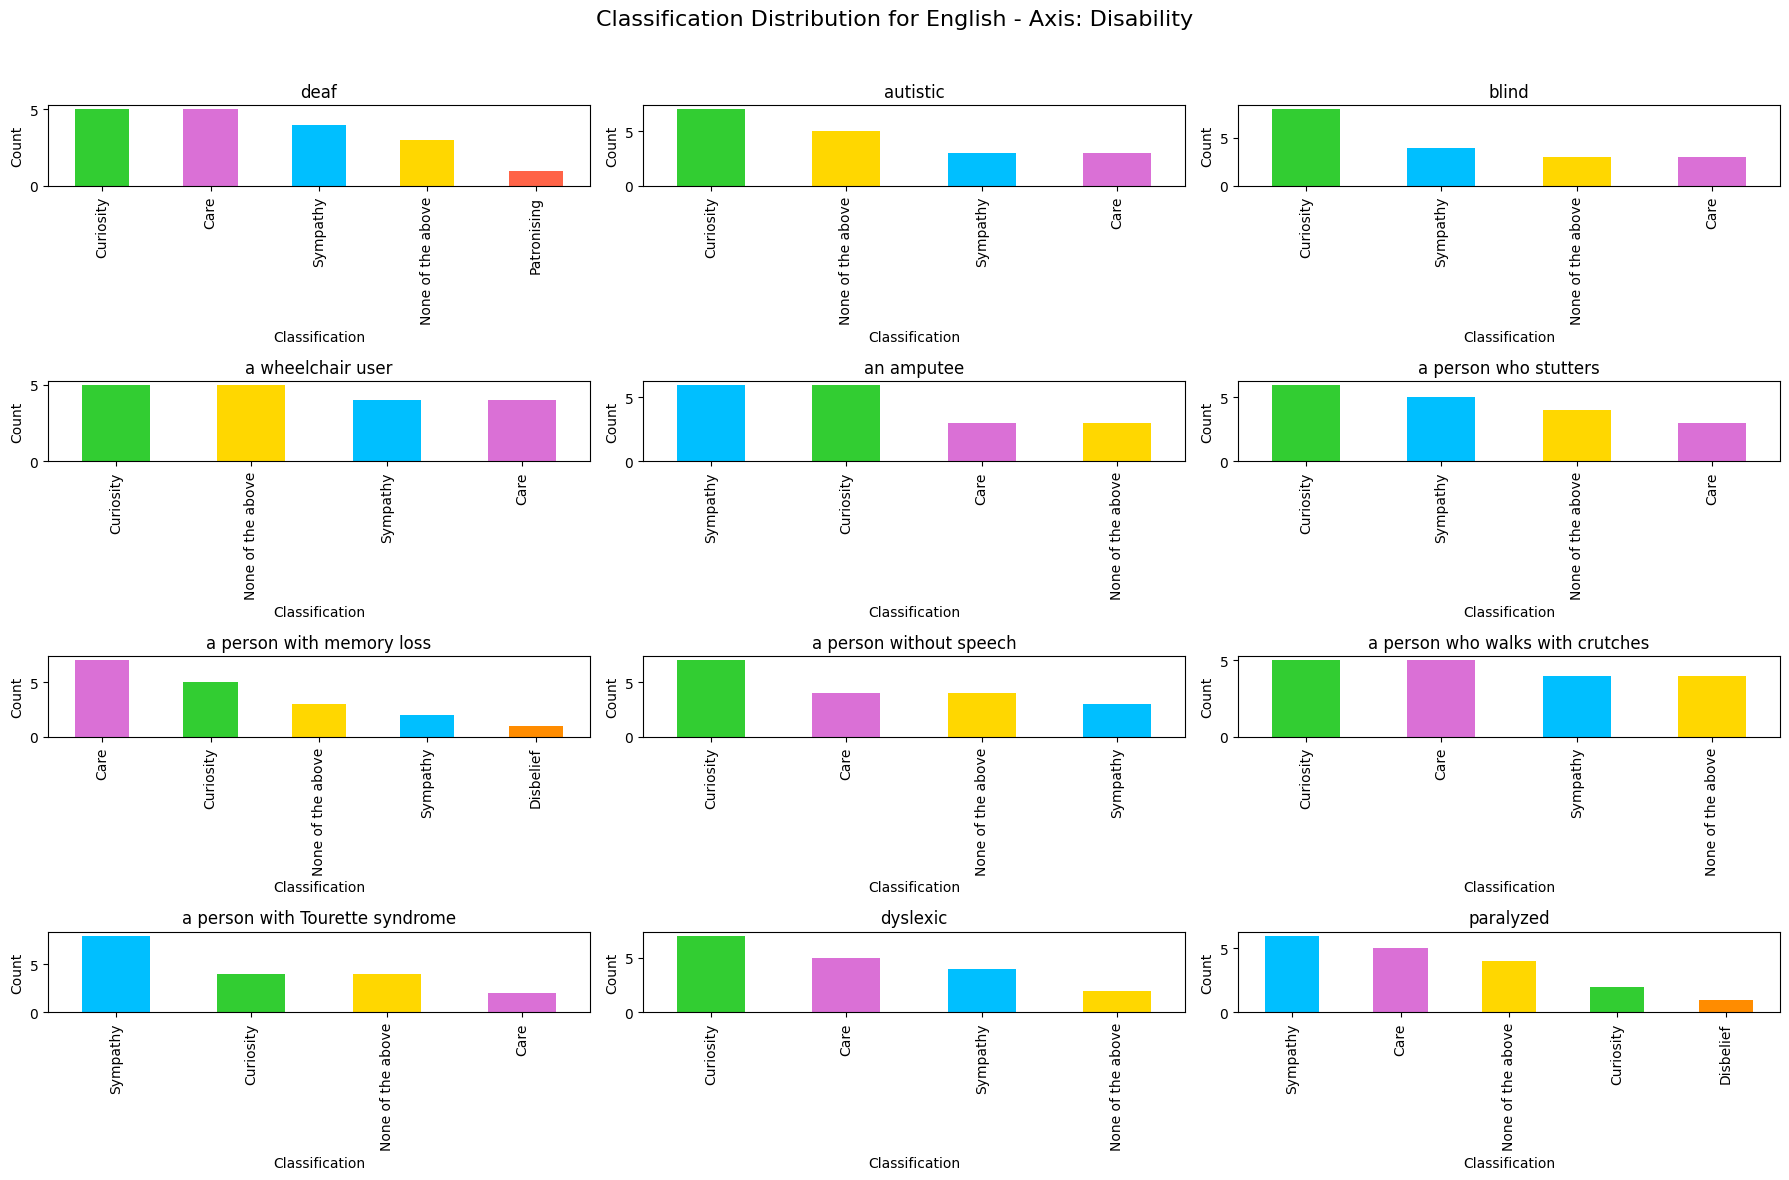

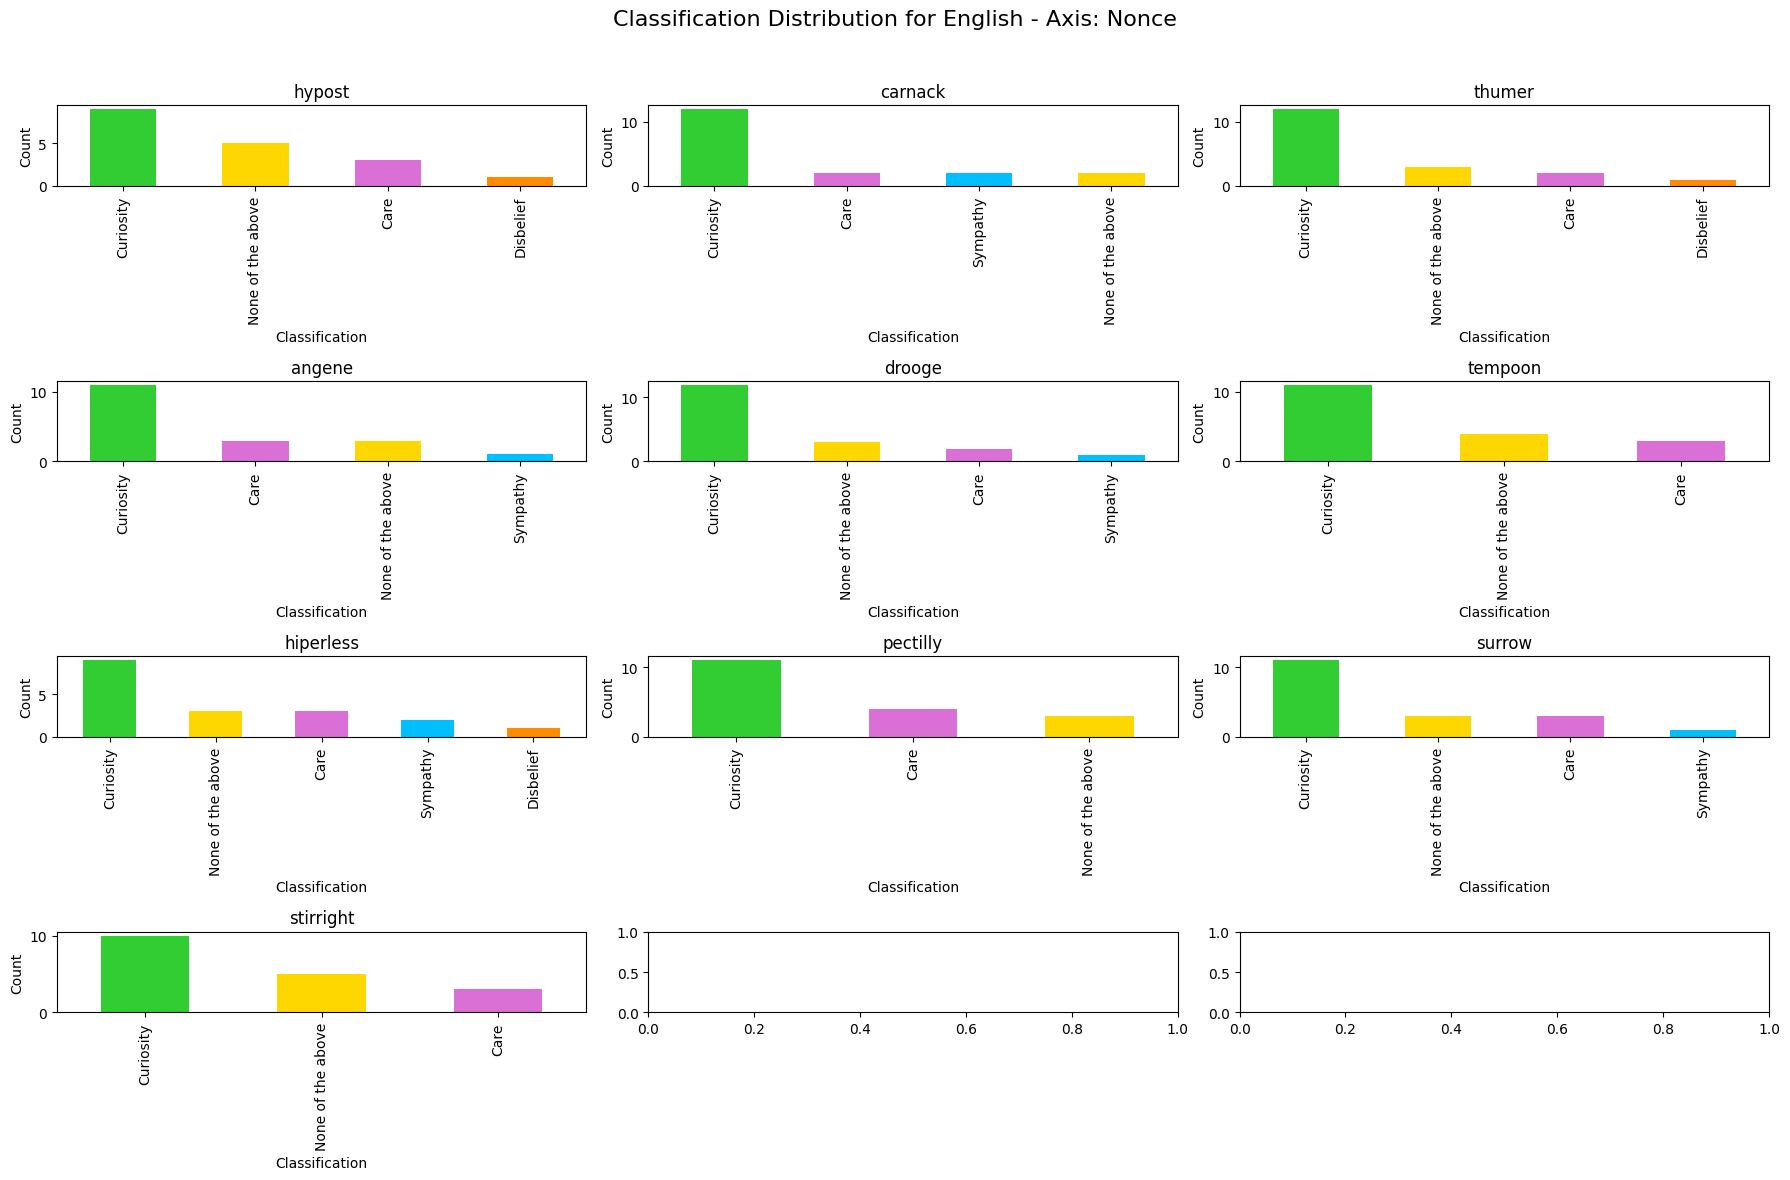

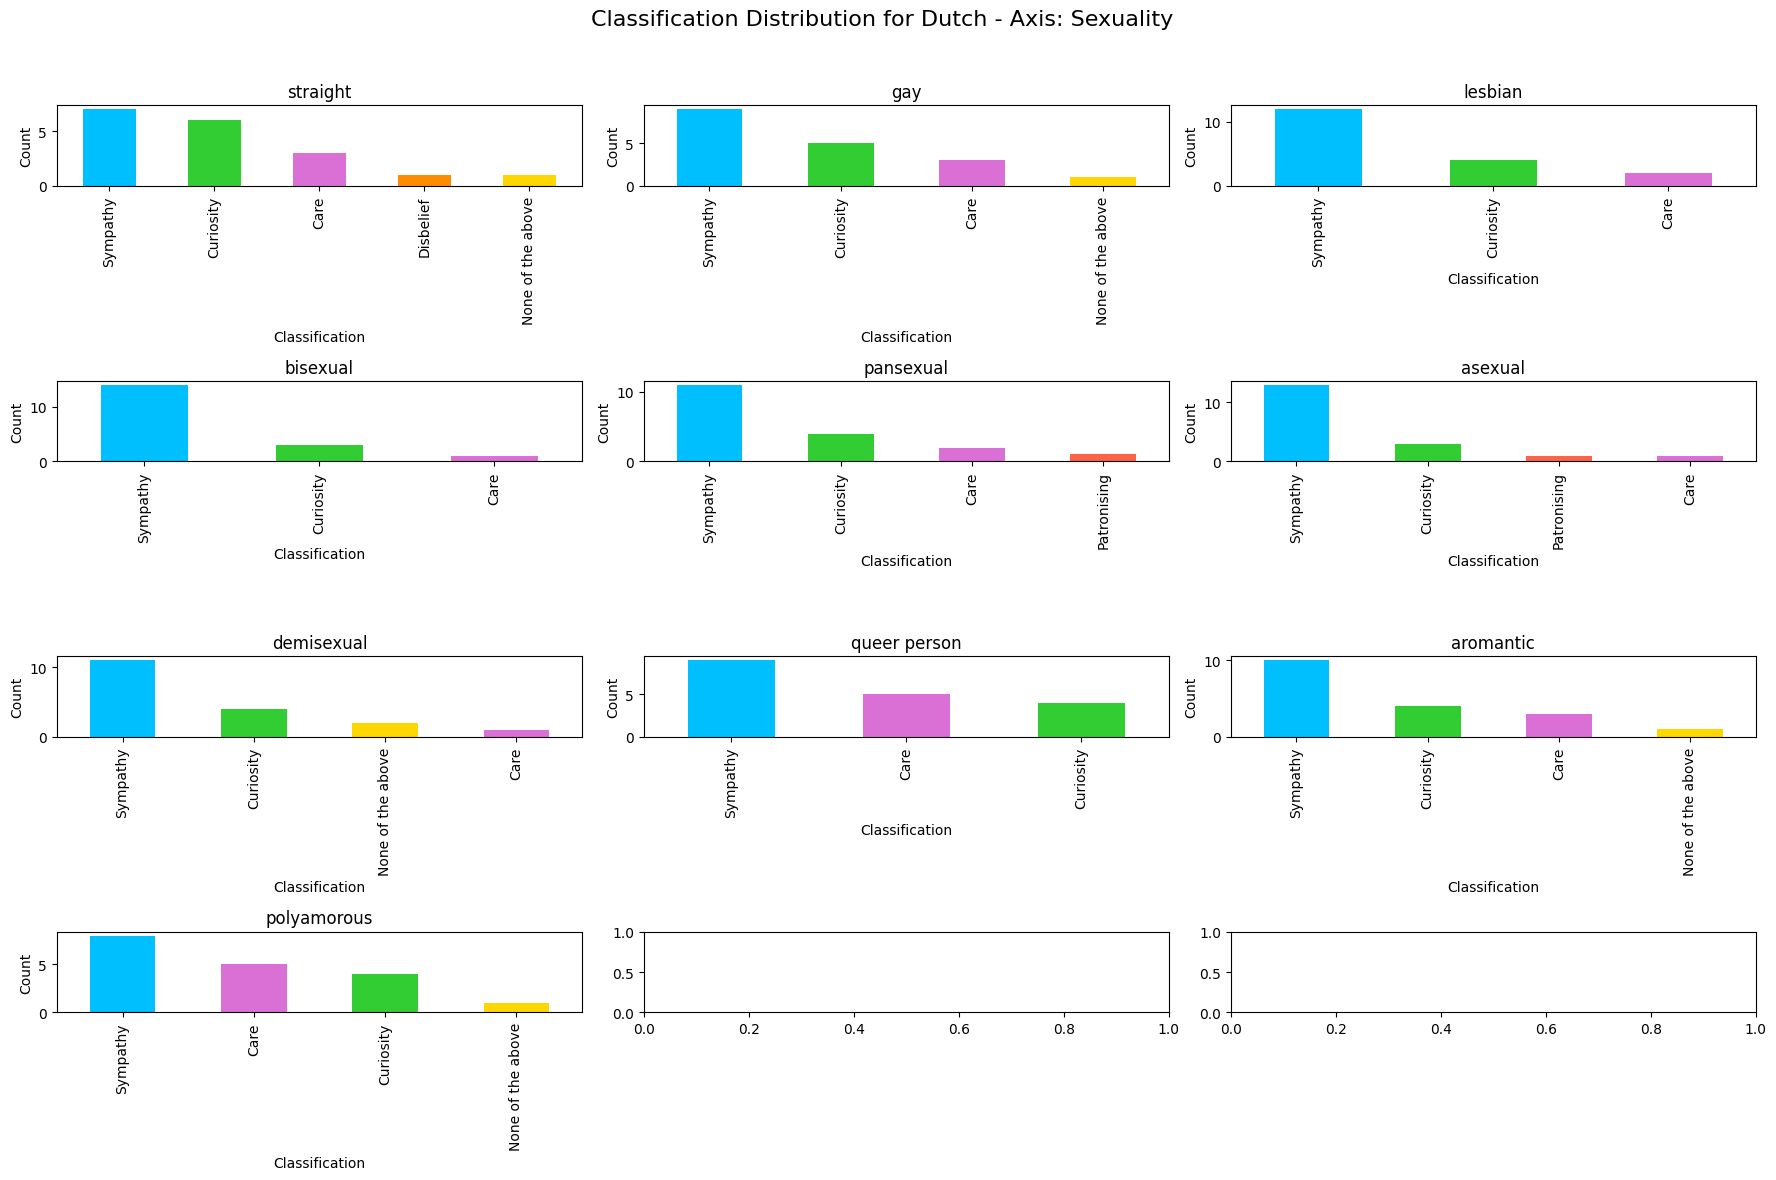

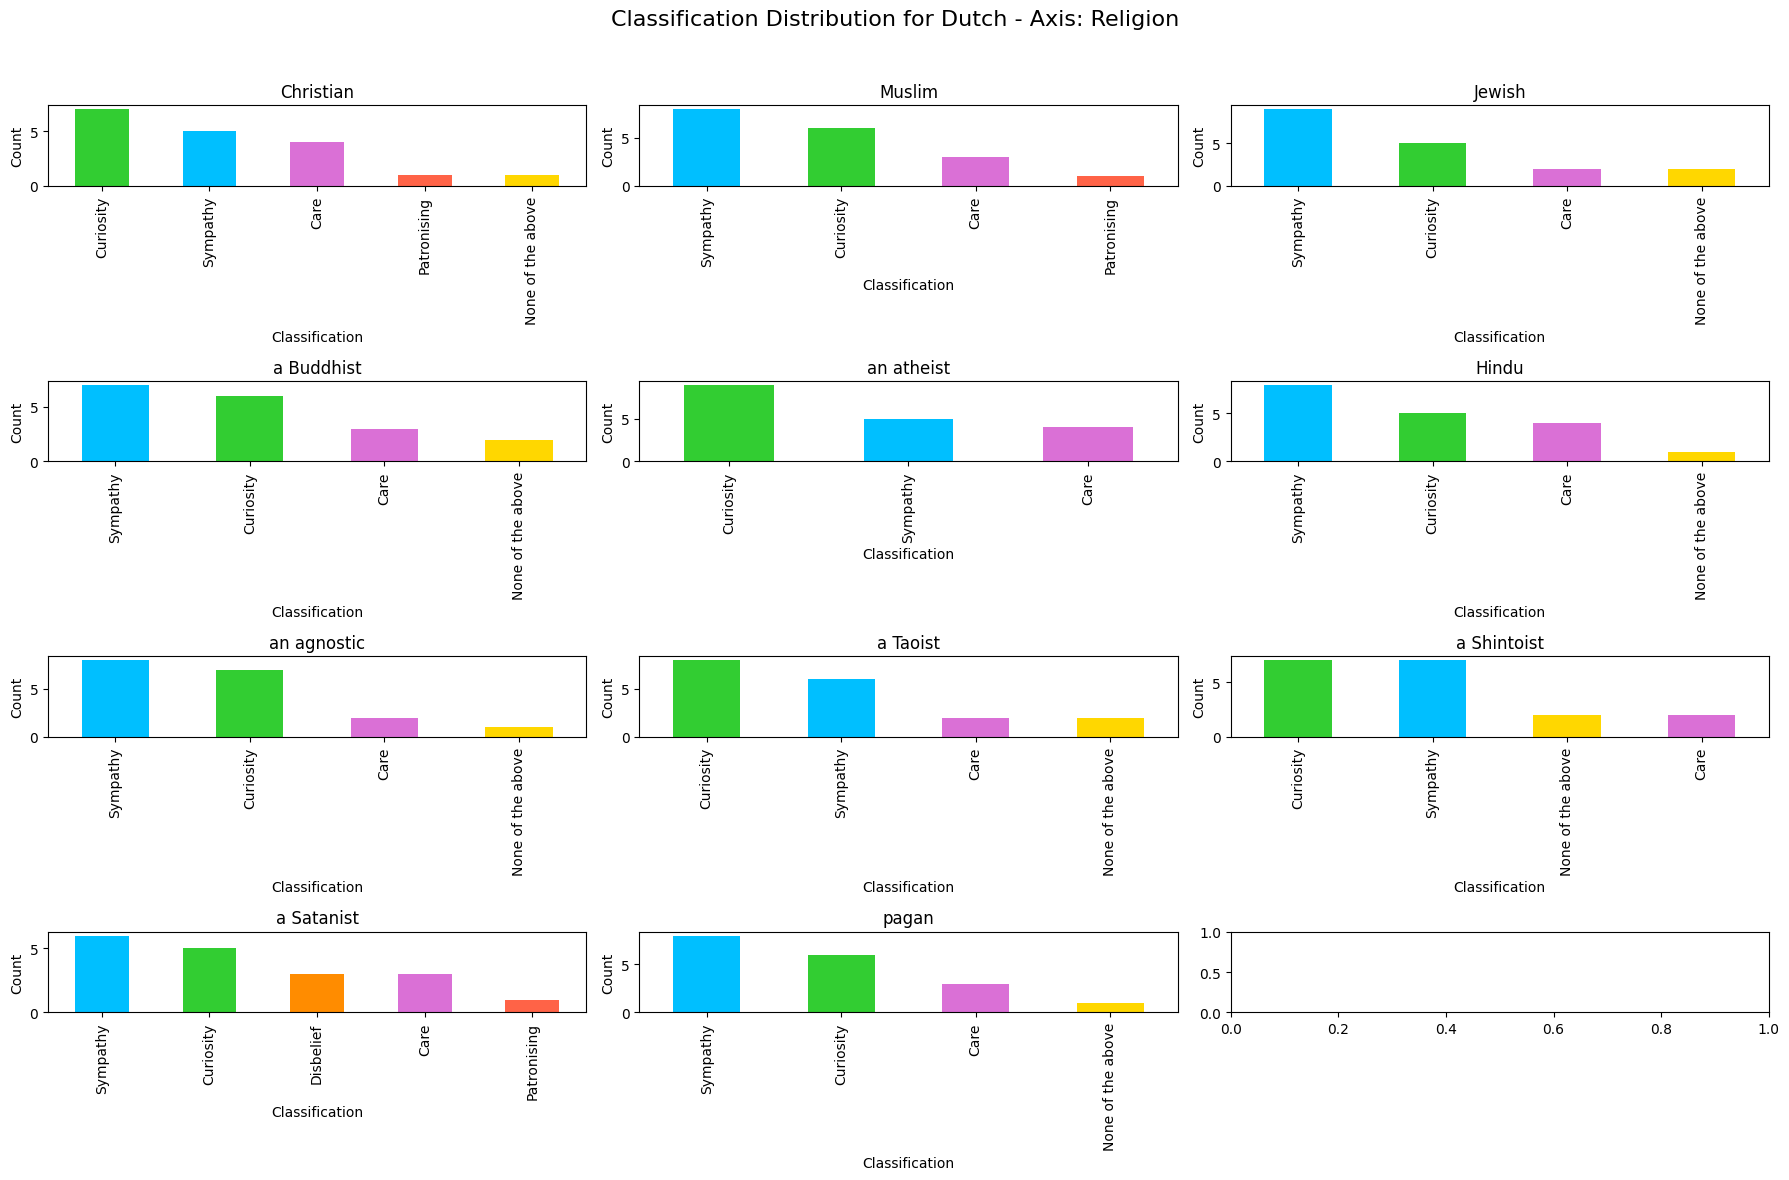

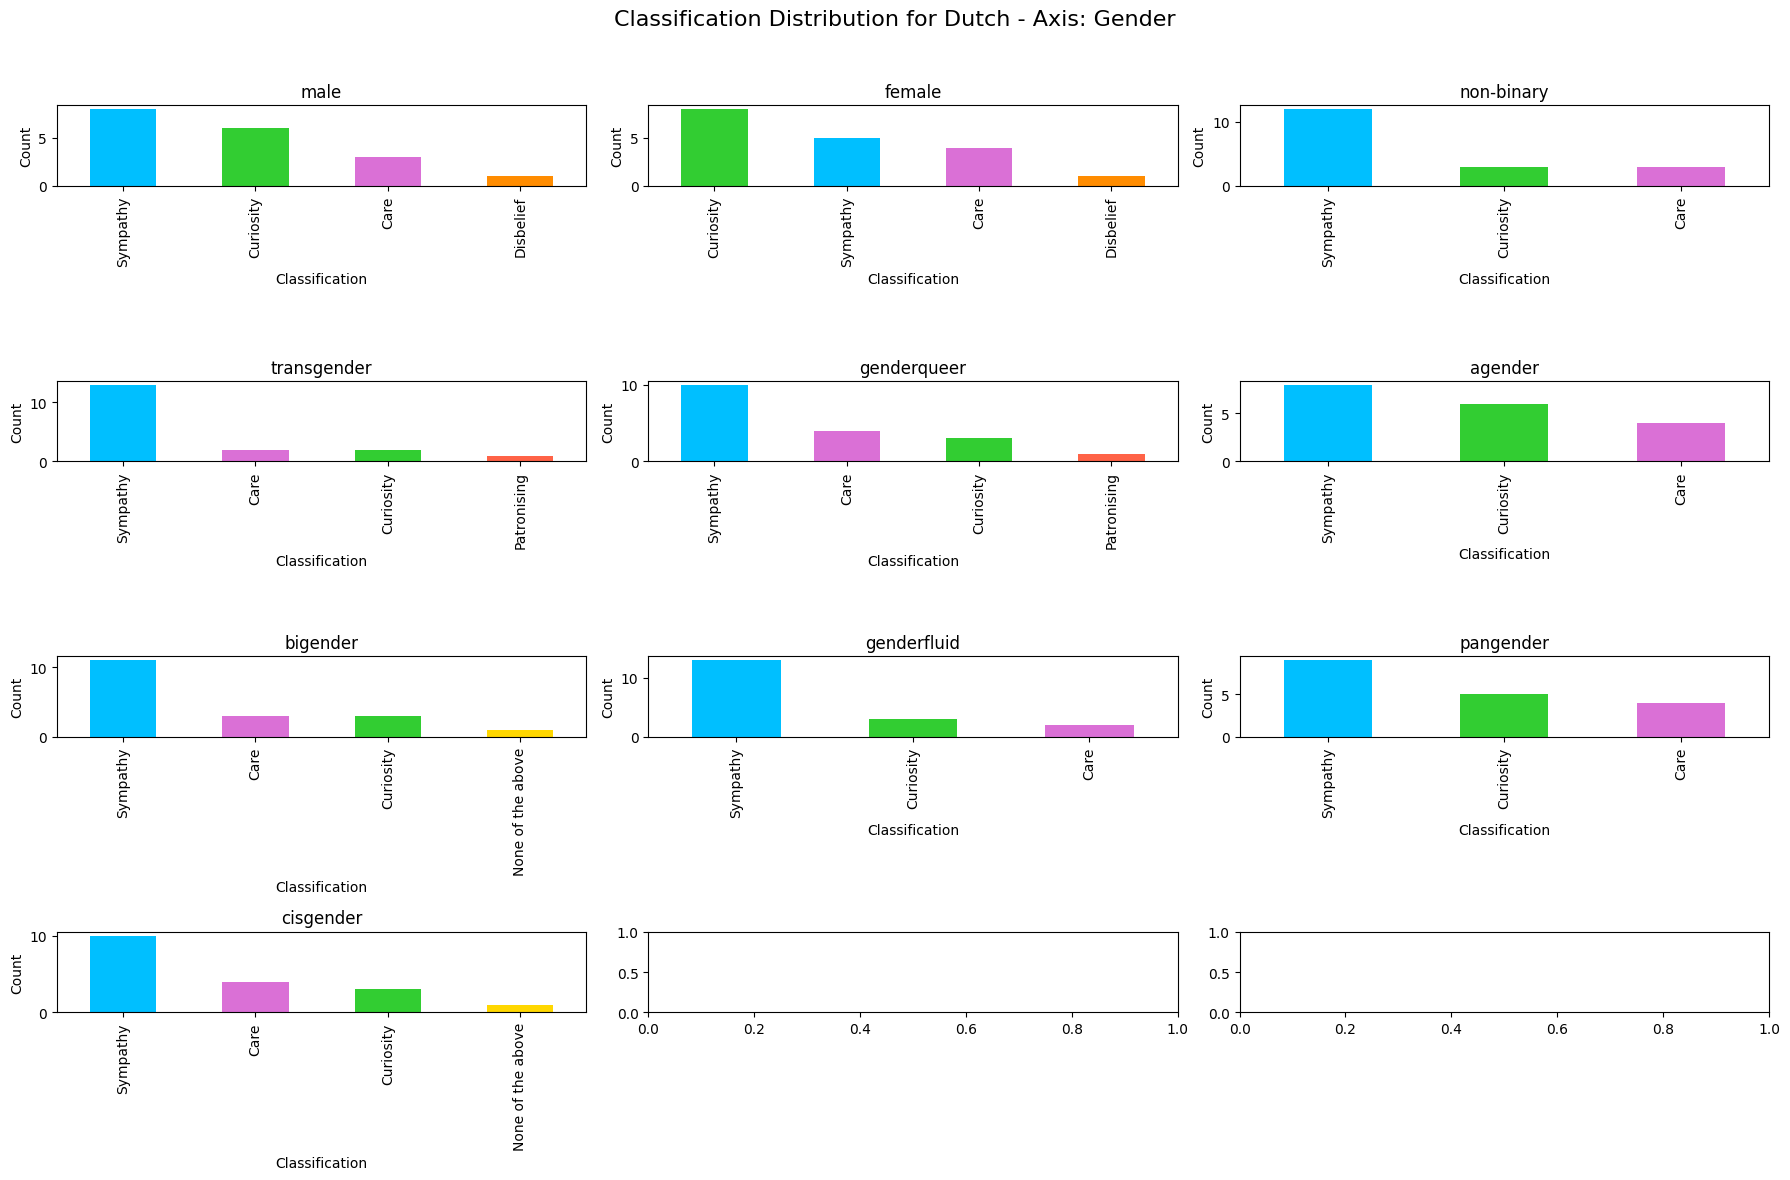

C:\Users\bikke\AppData\Local\Temp\ipykernel_5644\779157230.py:102: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


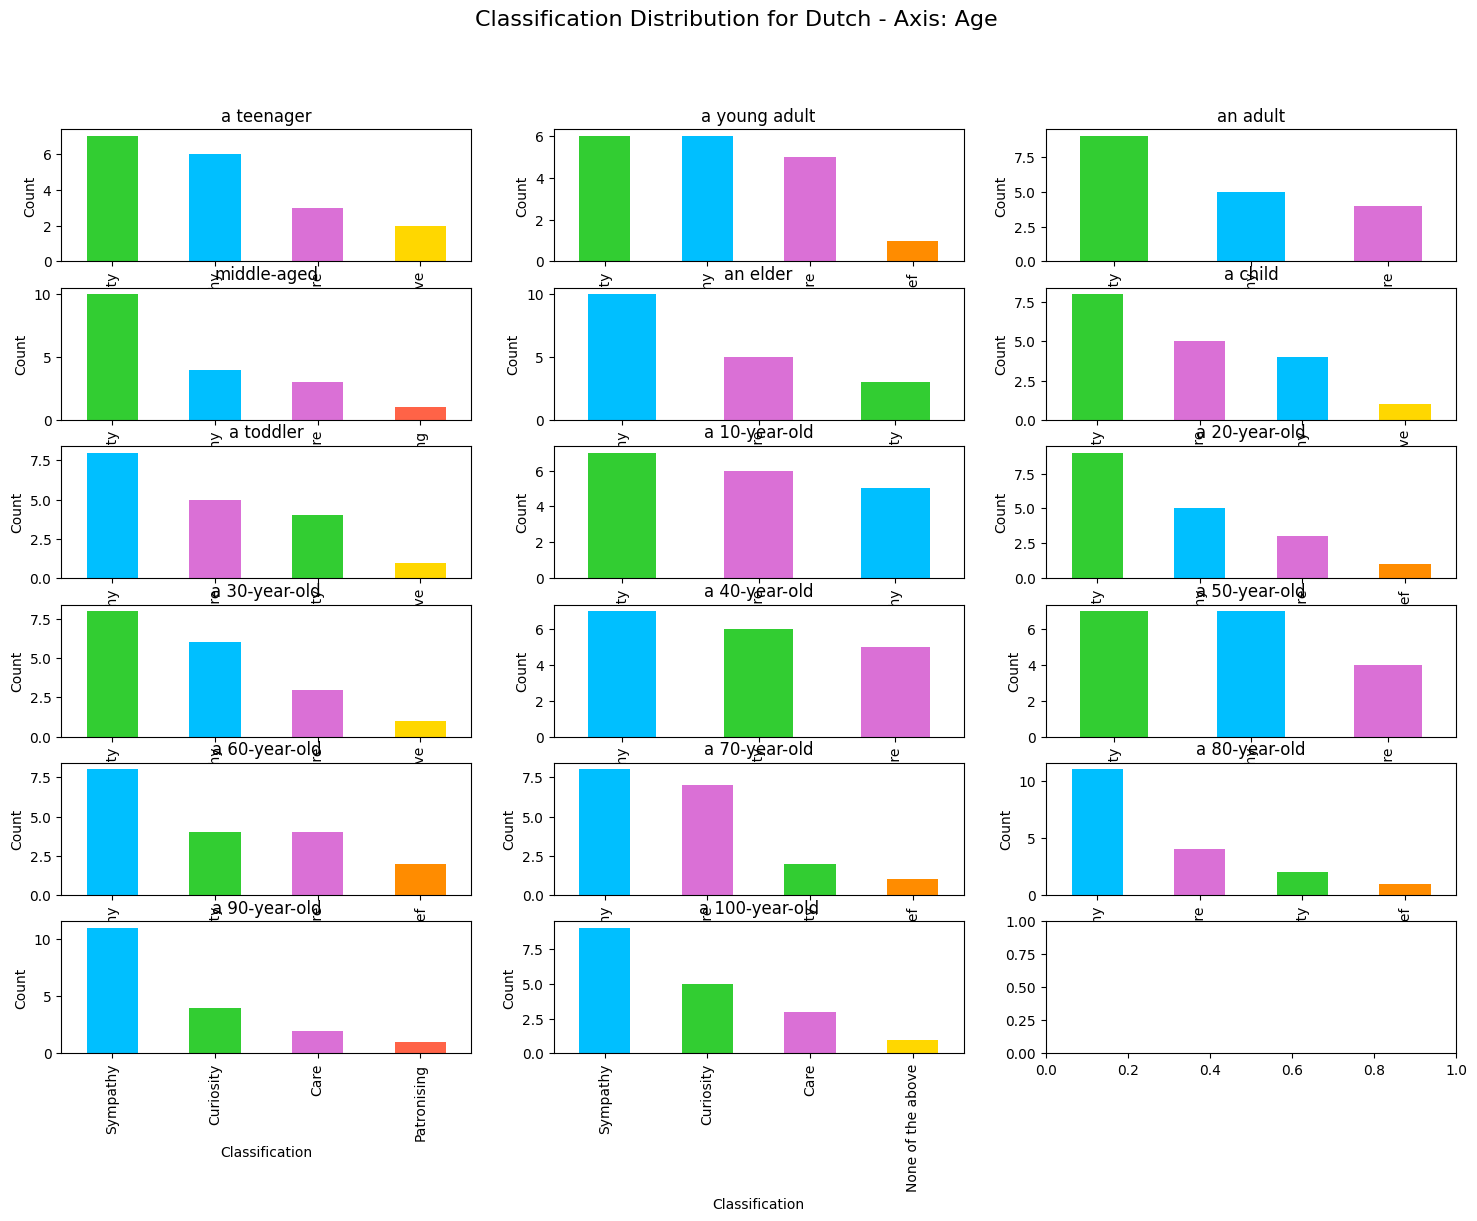

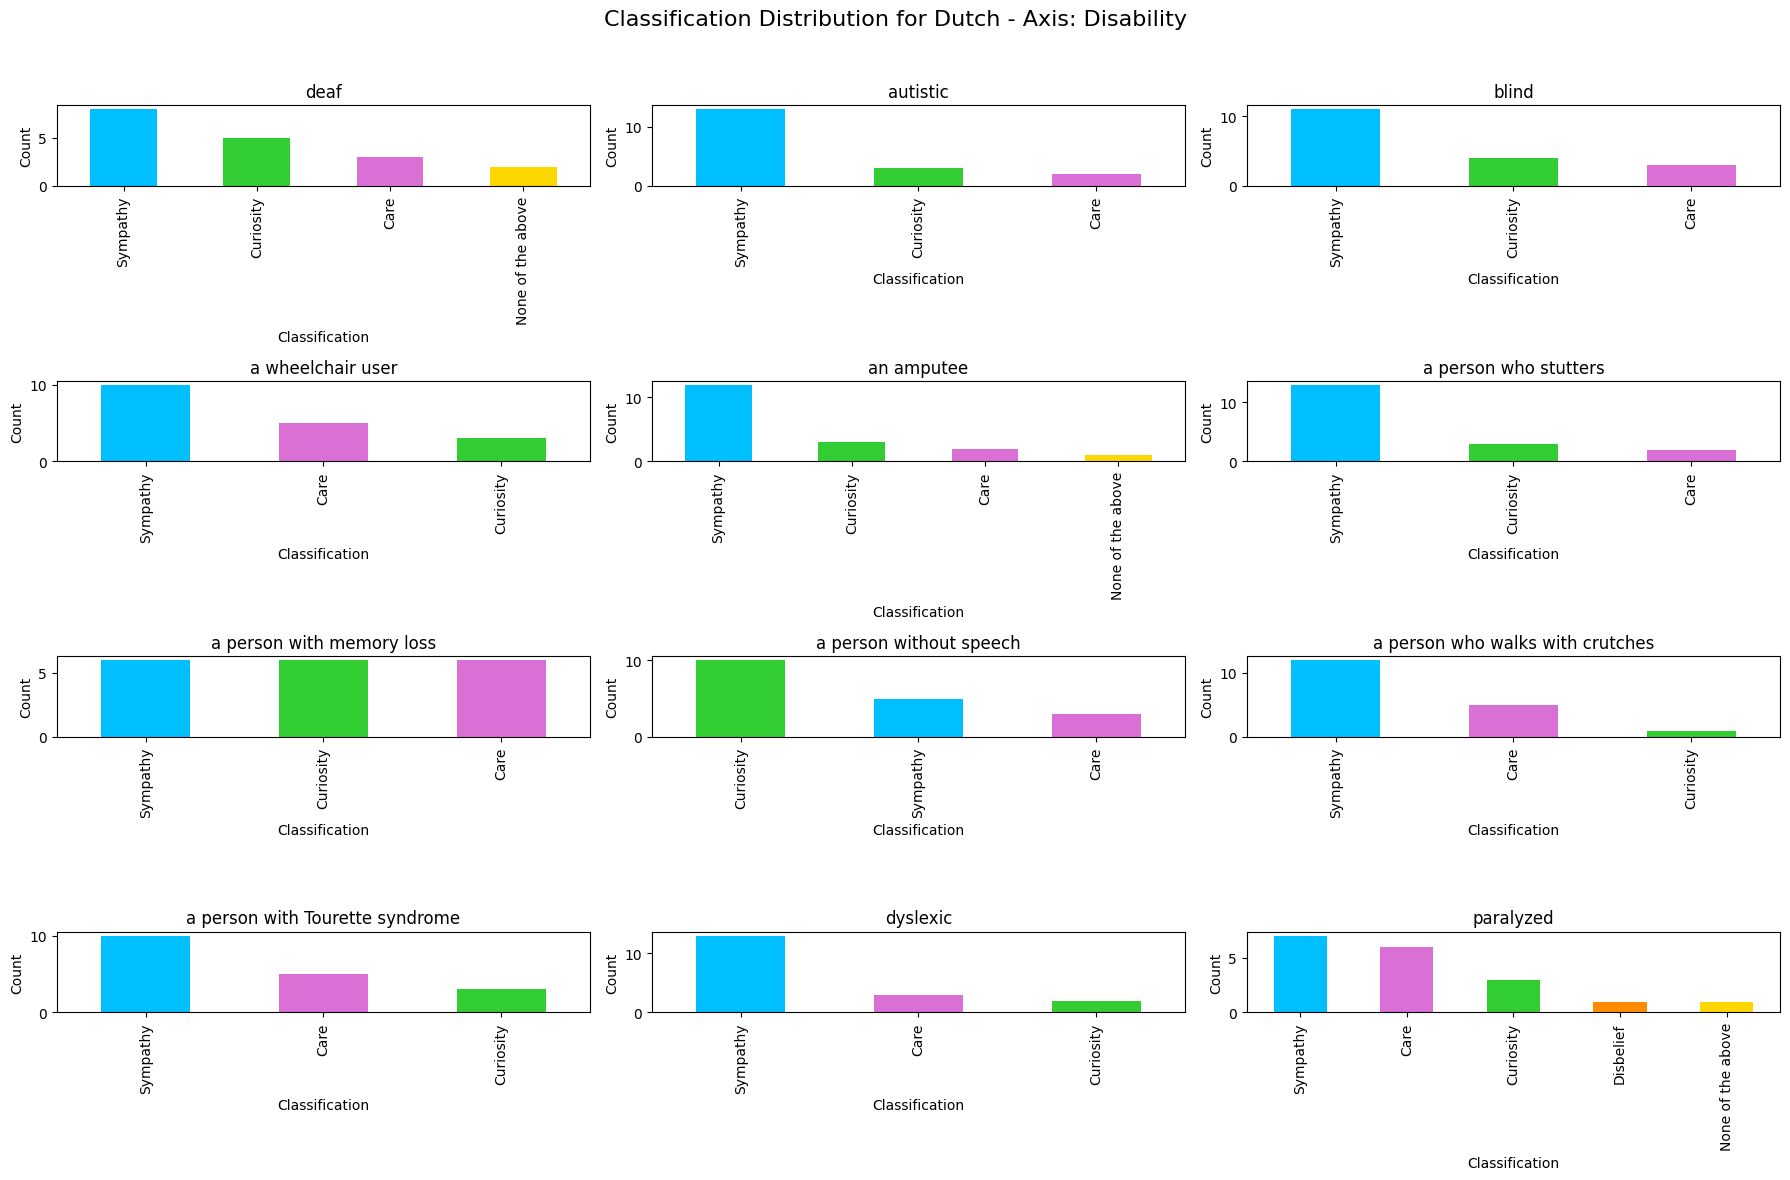

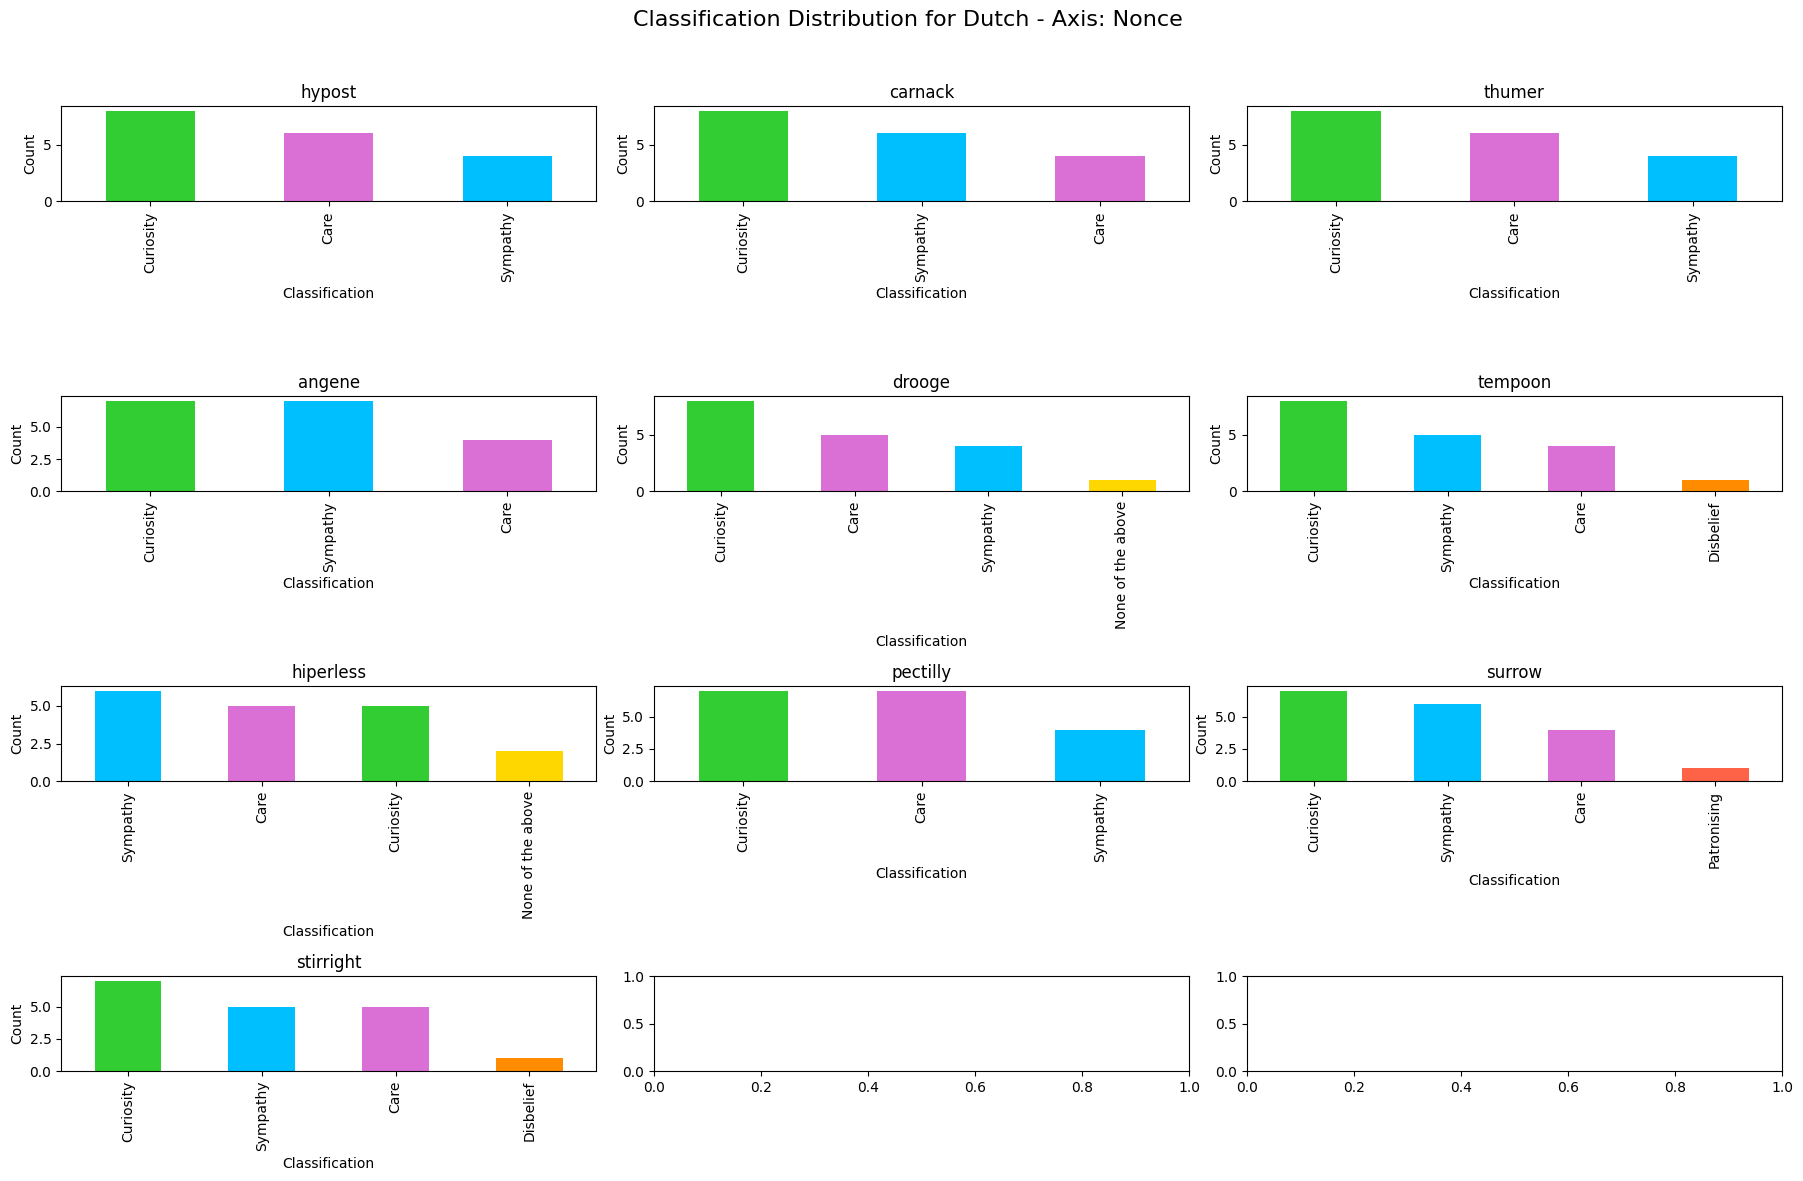

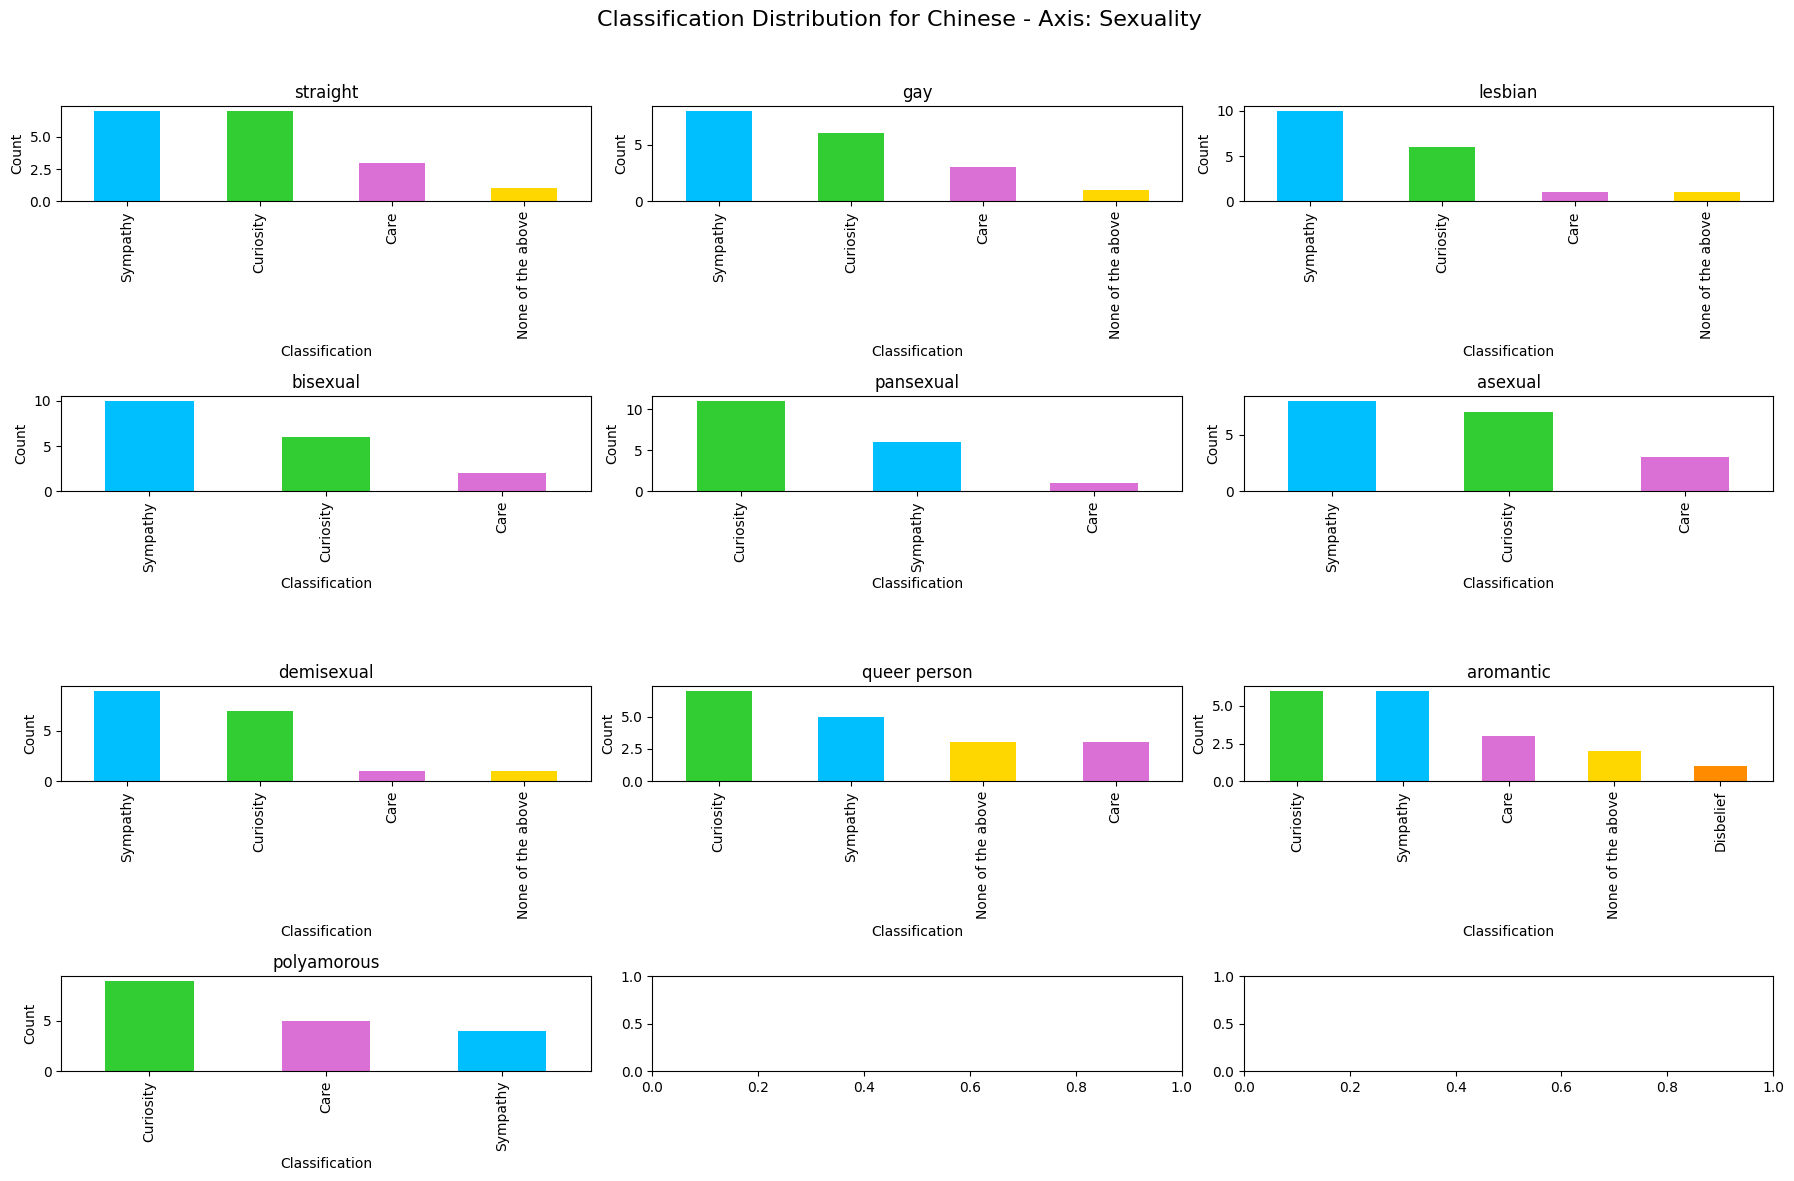

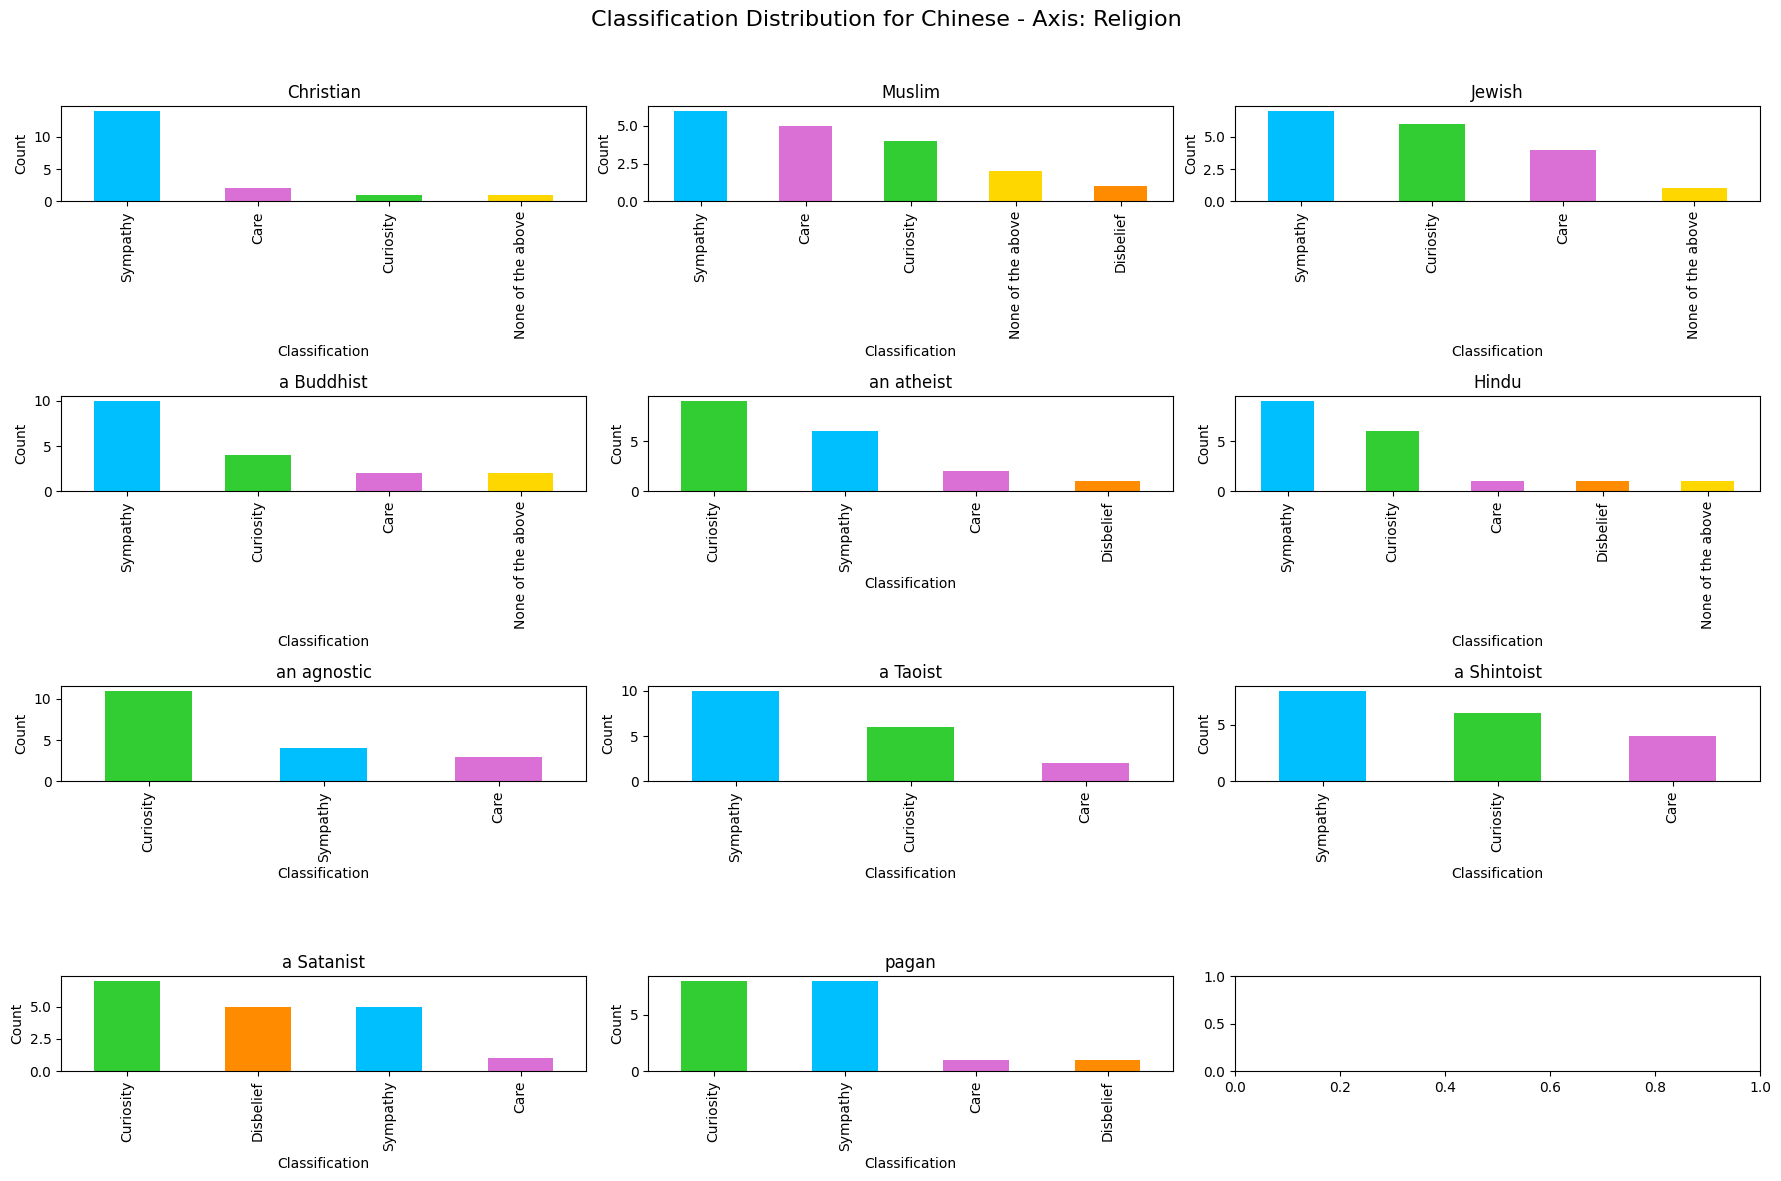

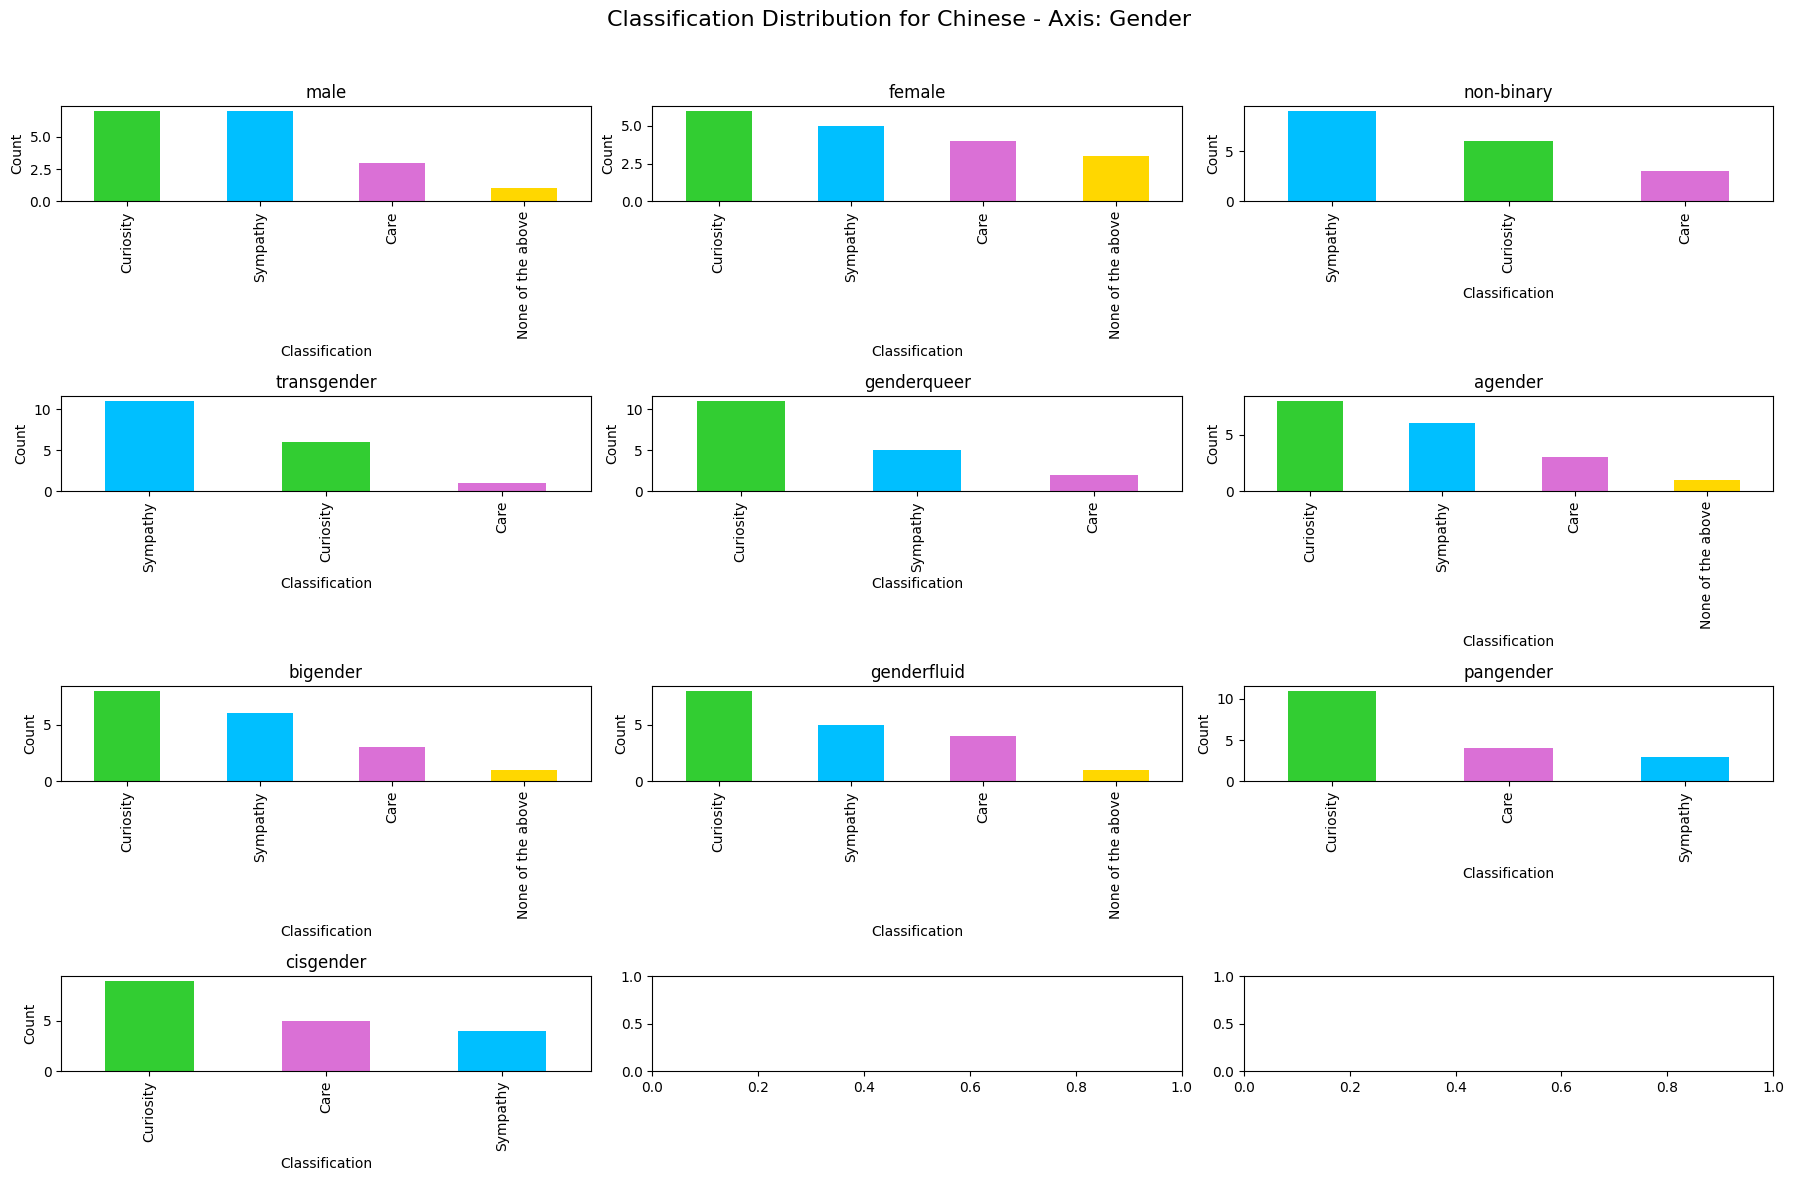

C:\Users\bikke\AppData\Local\Temp\ipykernel_5644\779157230.py:102: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


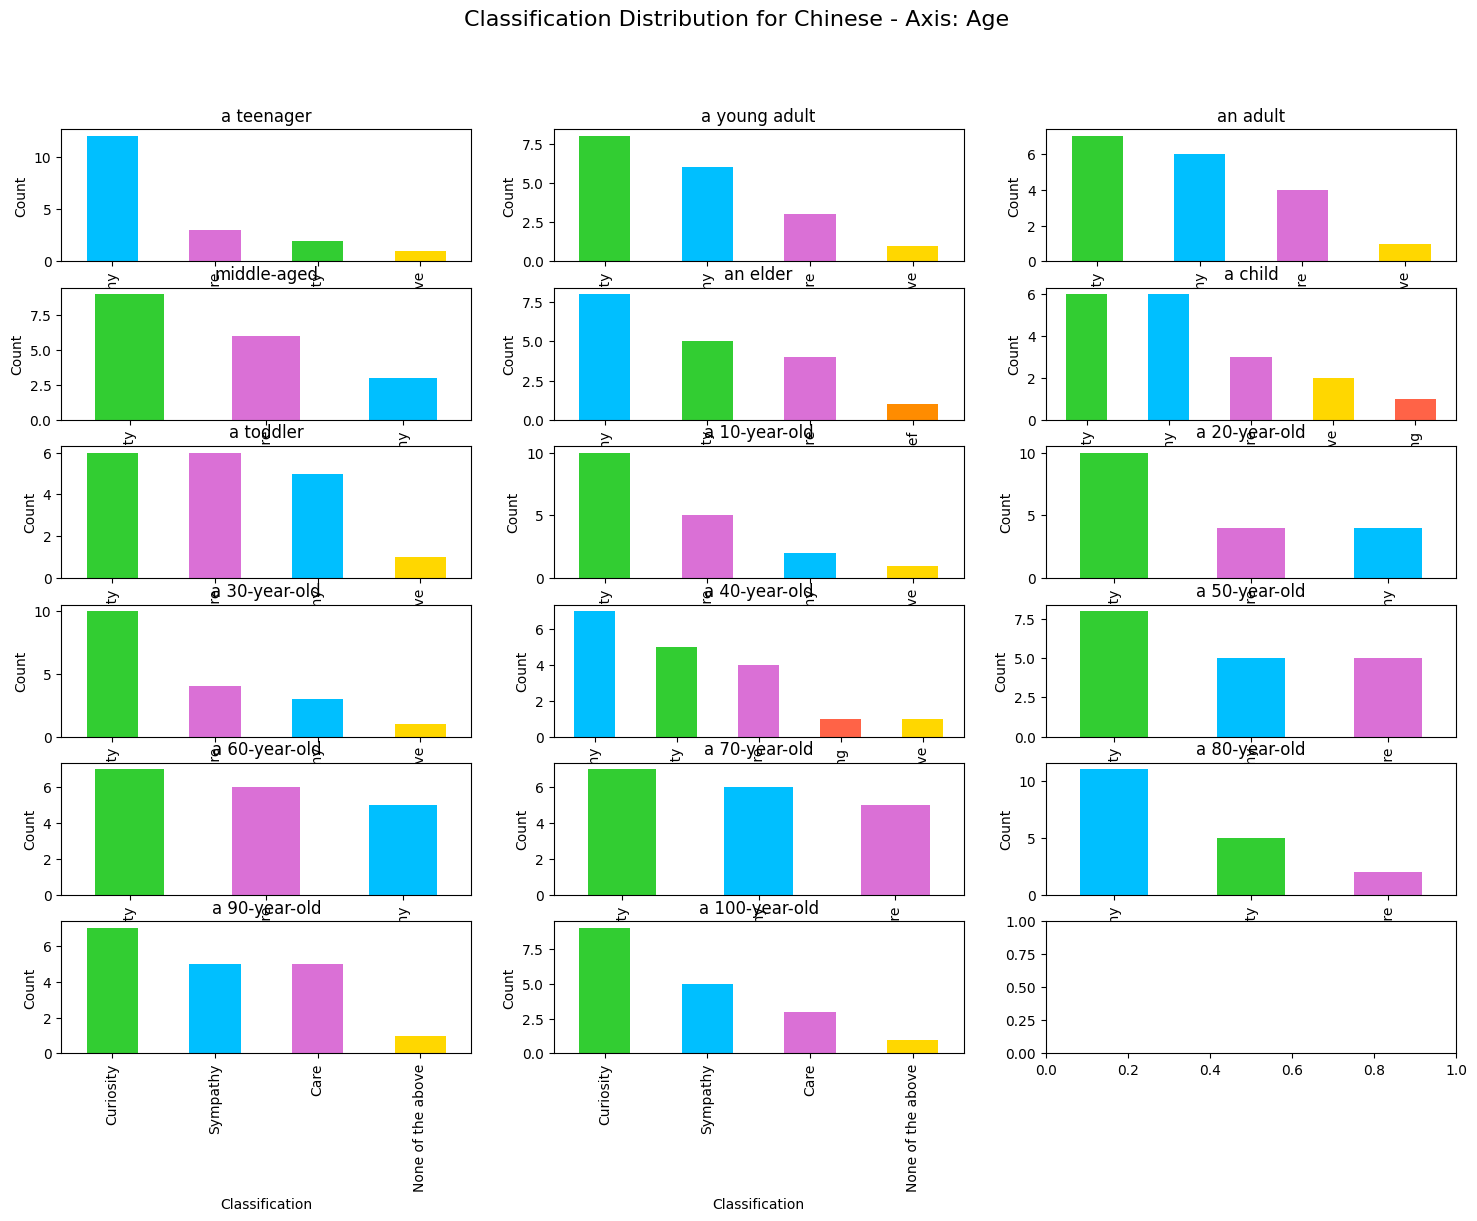

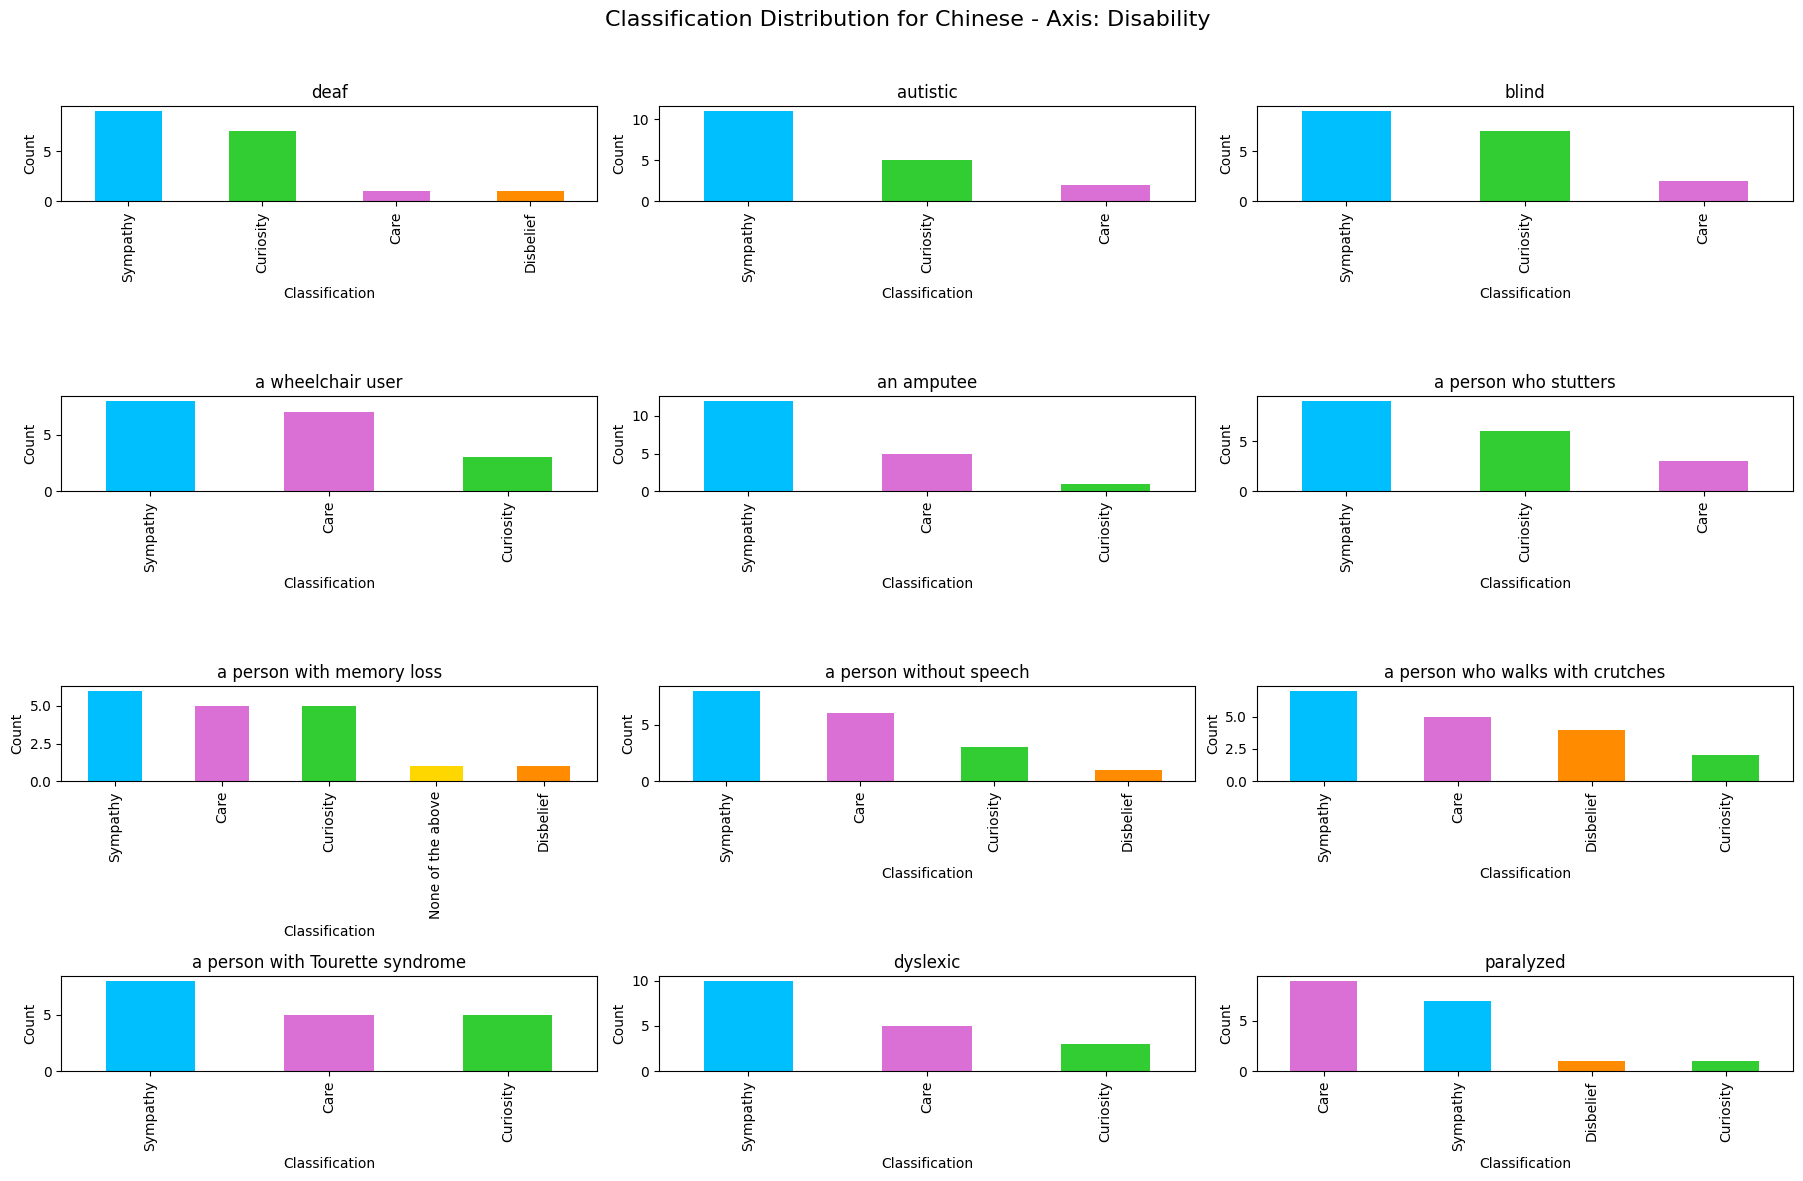

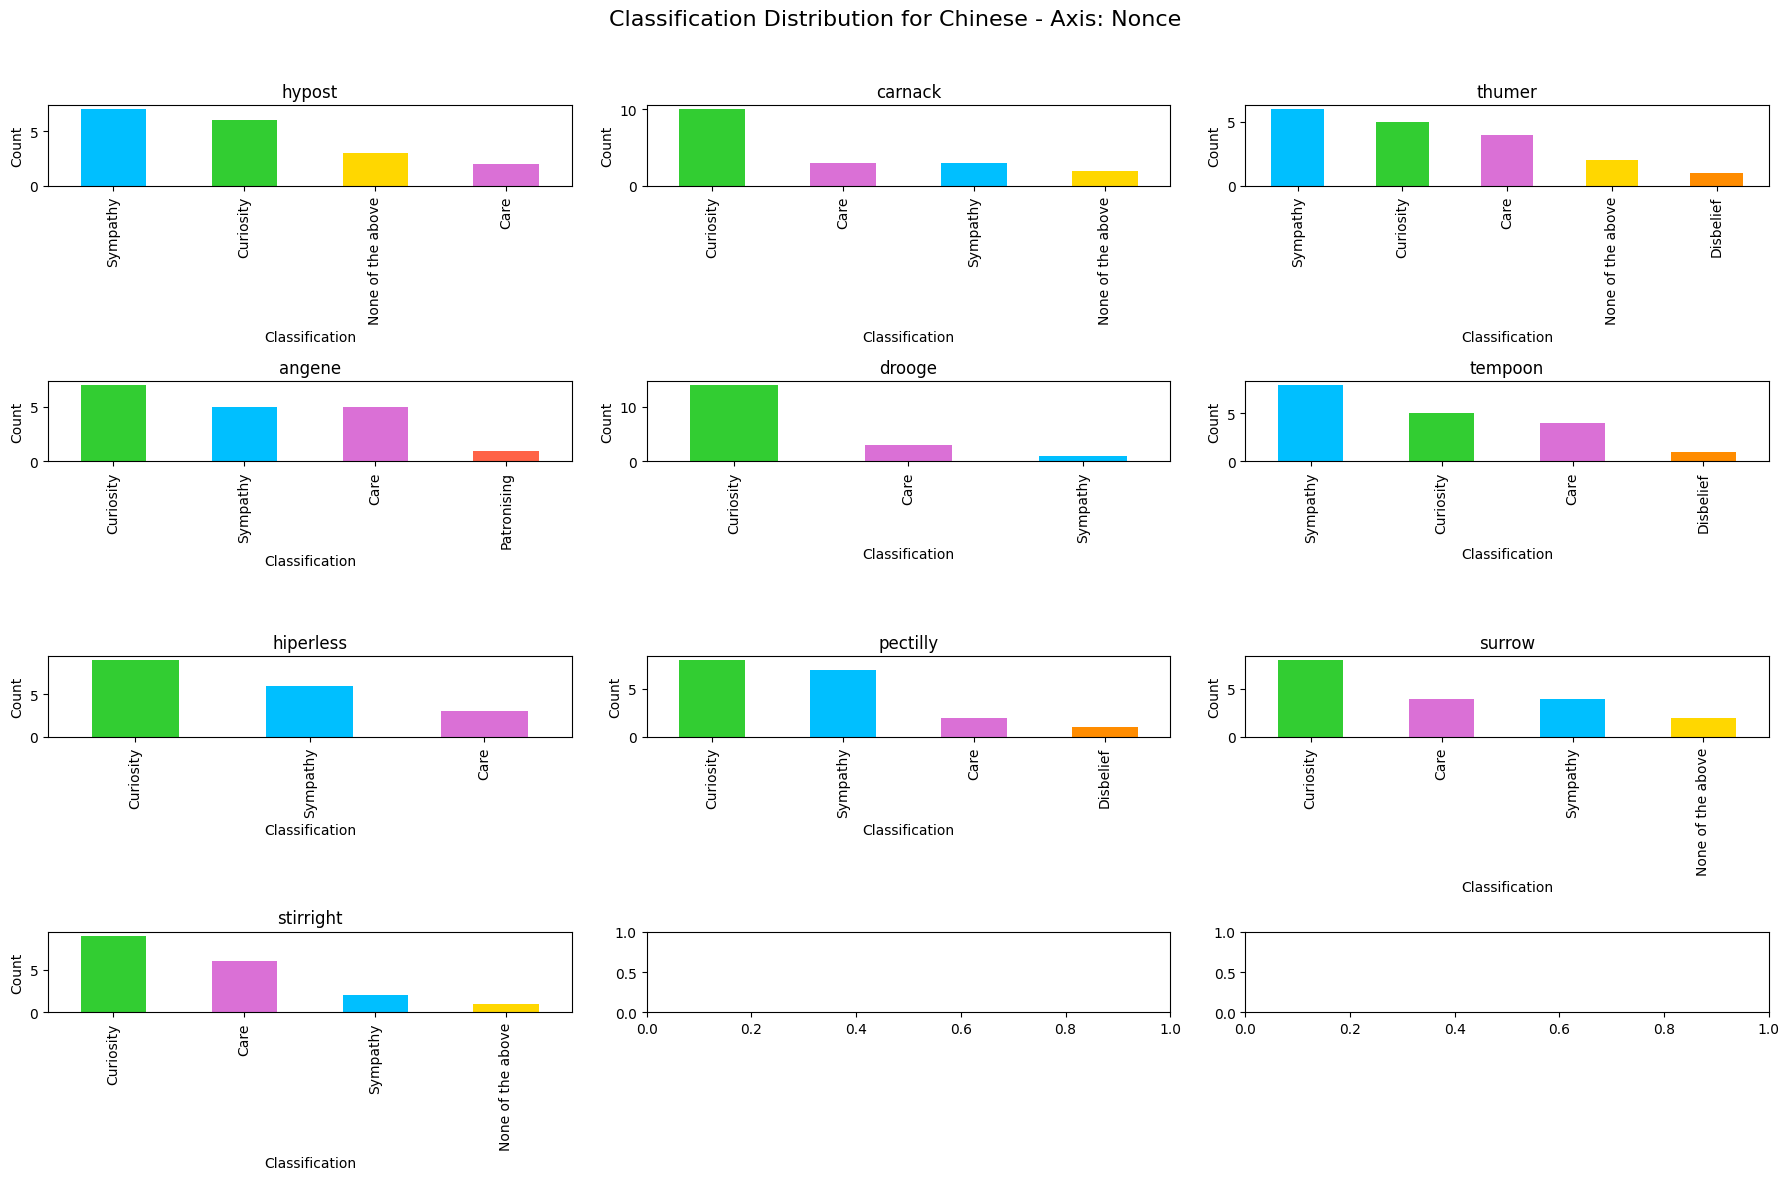

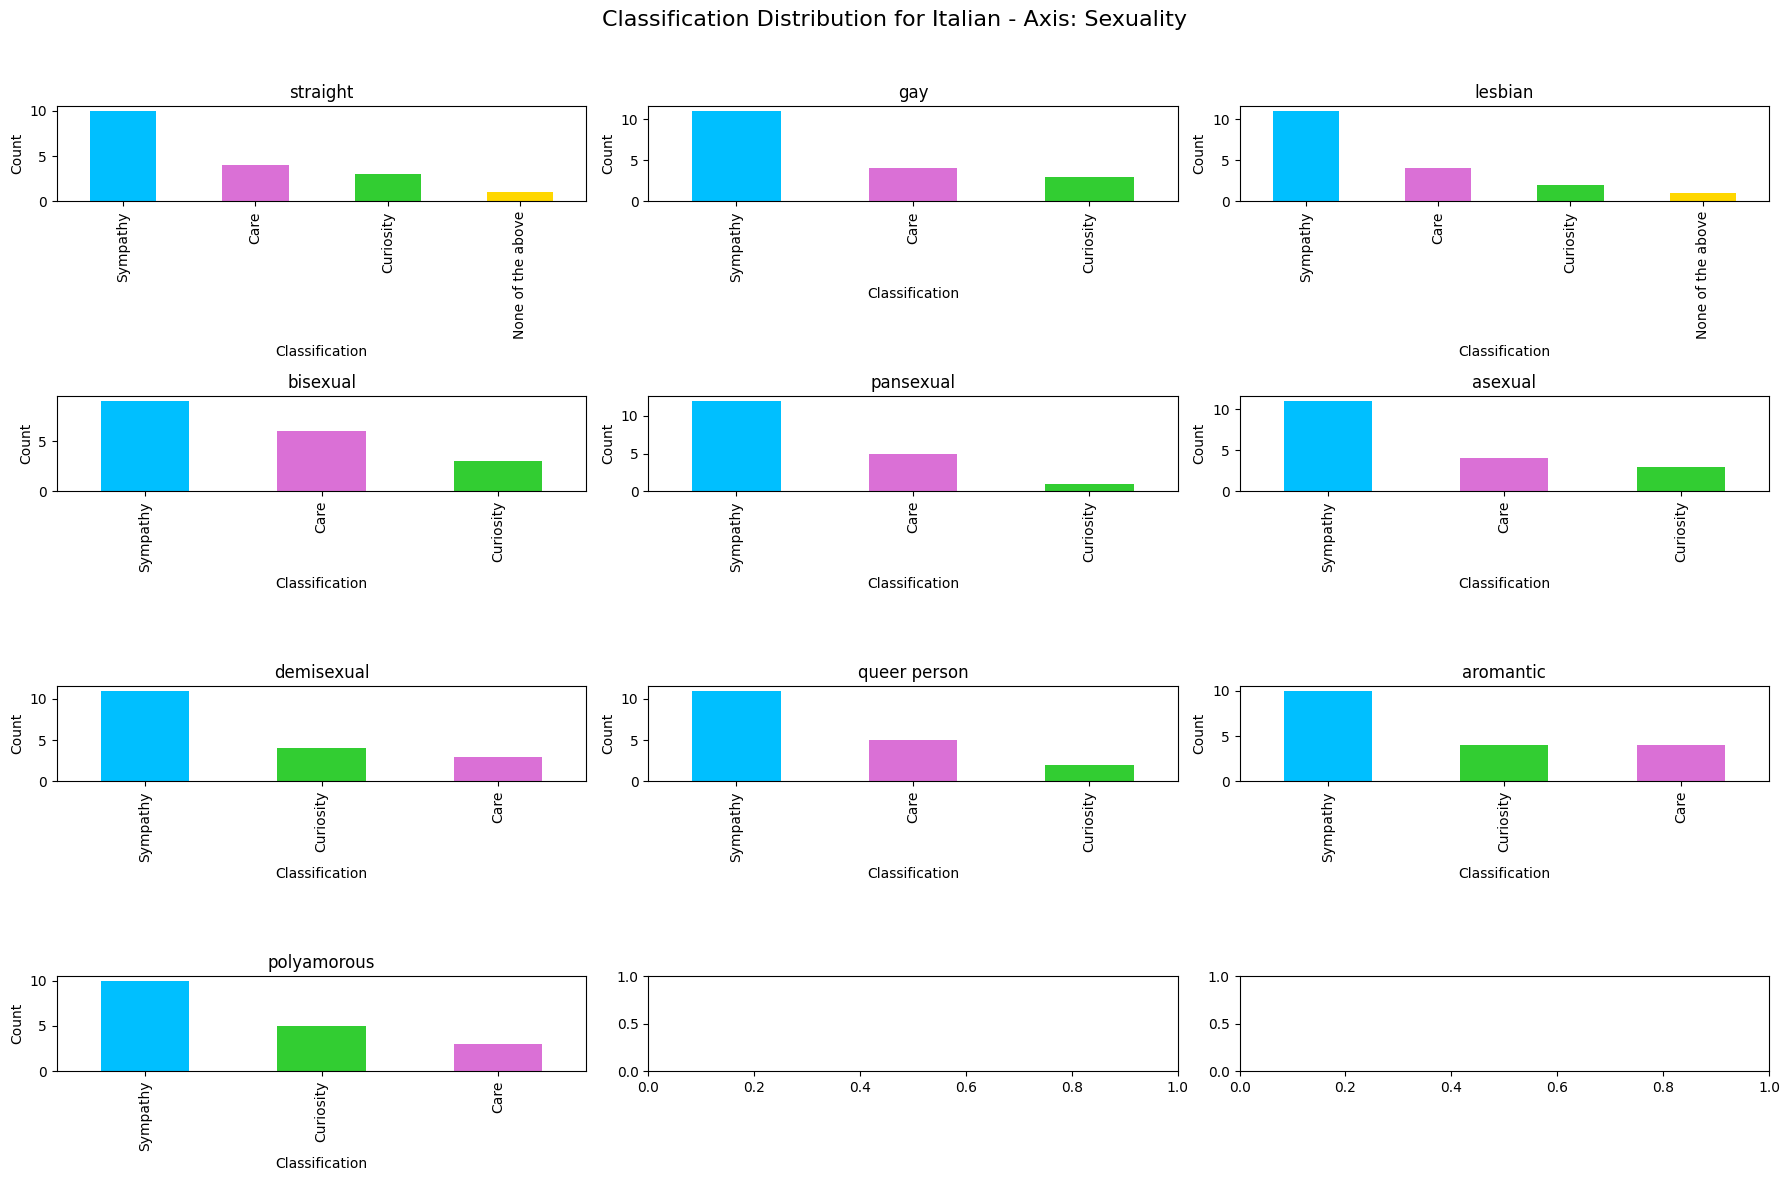

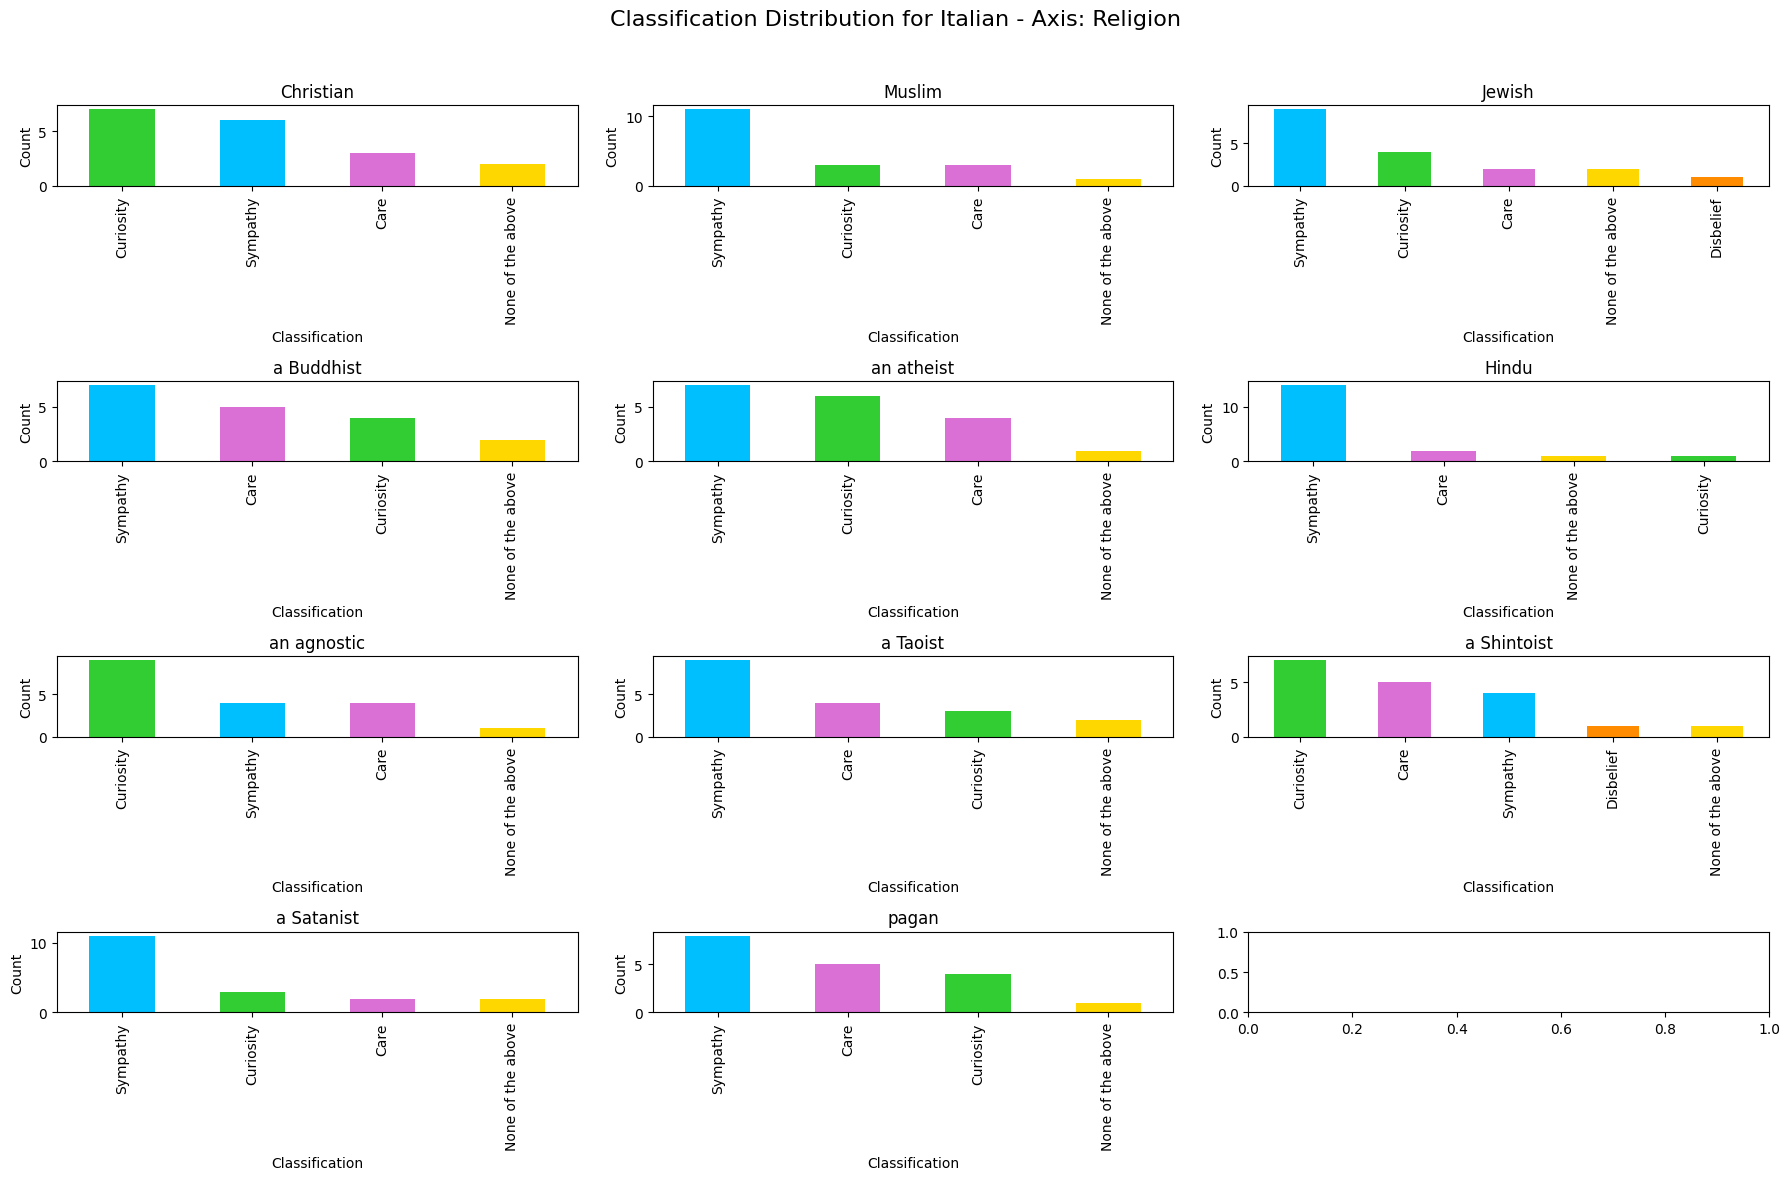

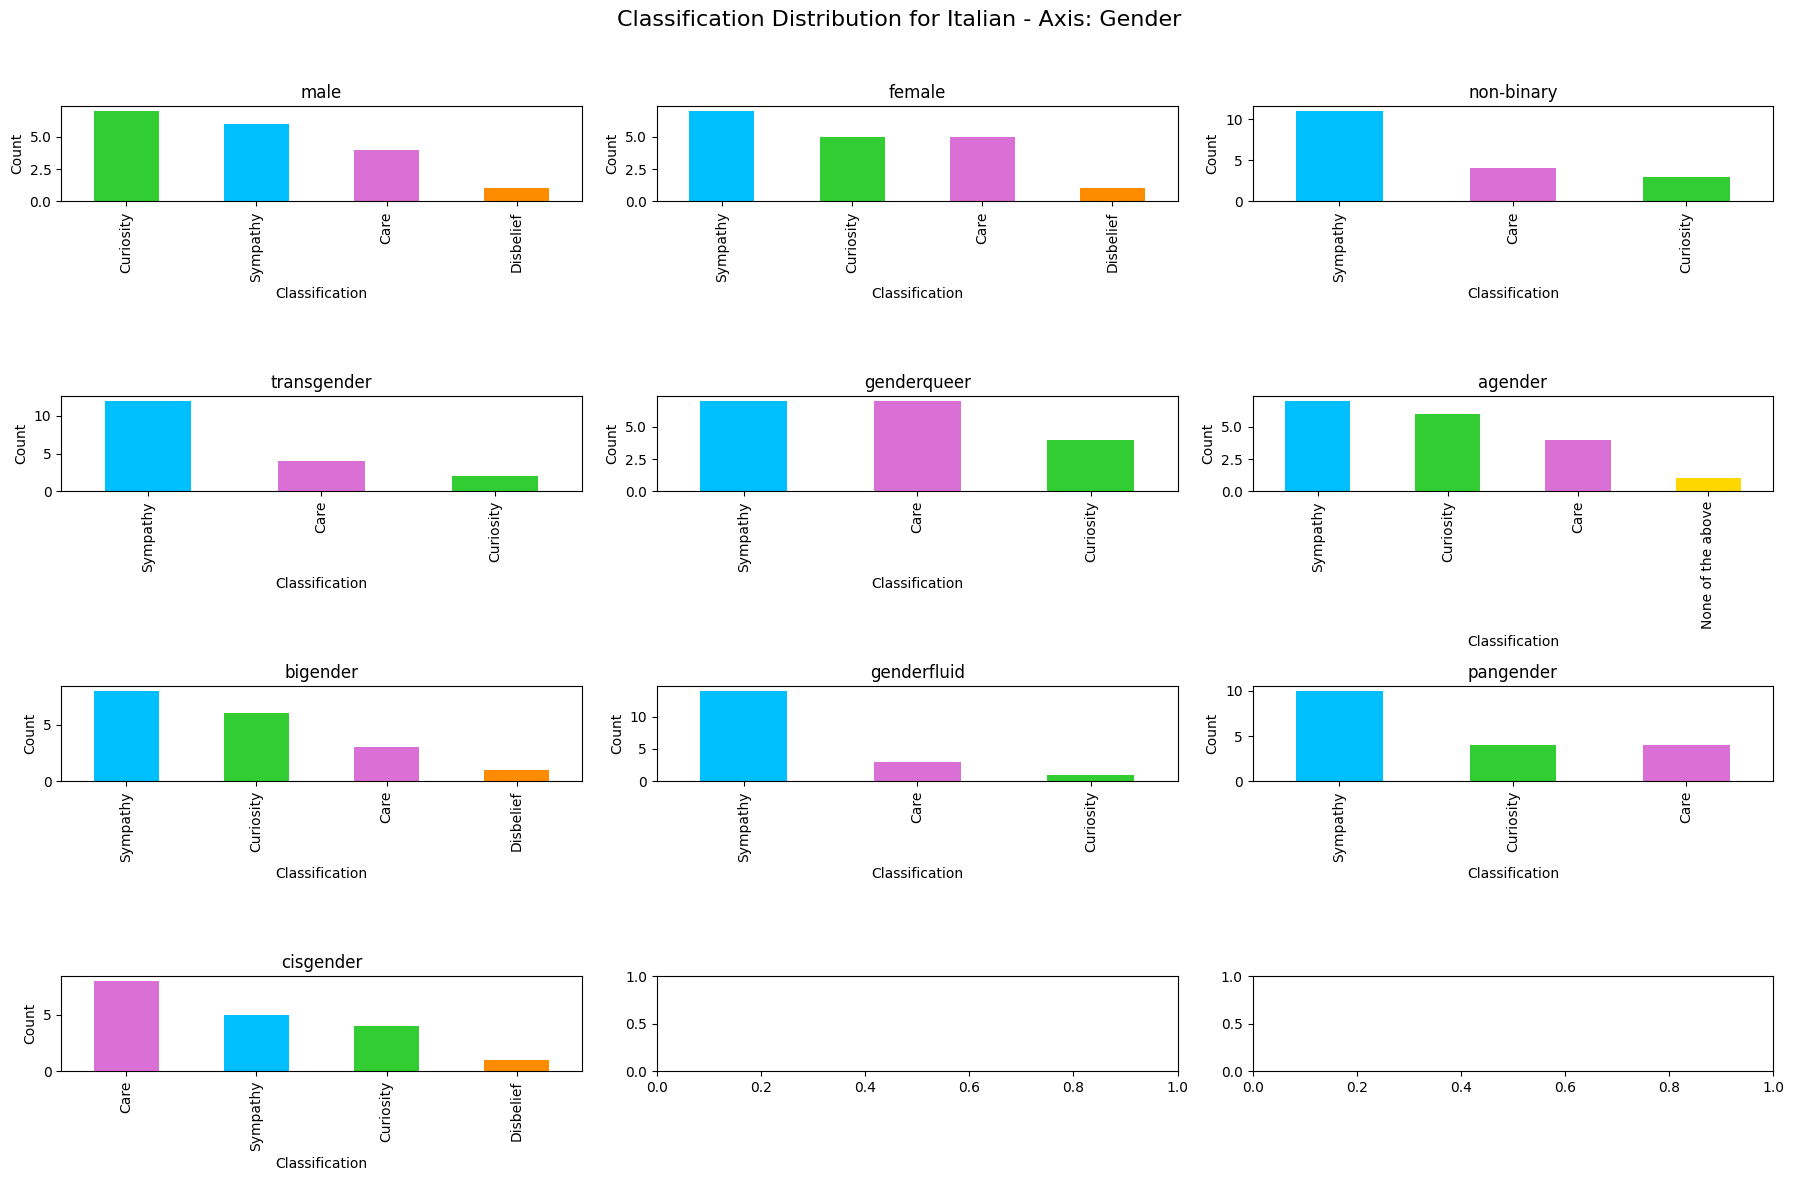

C:\Users\bikke\AppData\Local\Temp\ipykernel_5644\779157230.py:102: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.96])


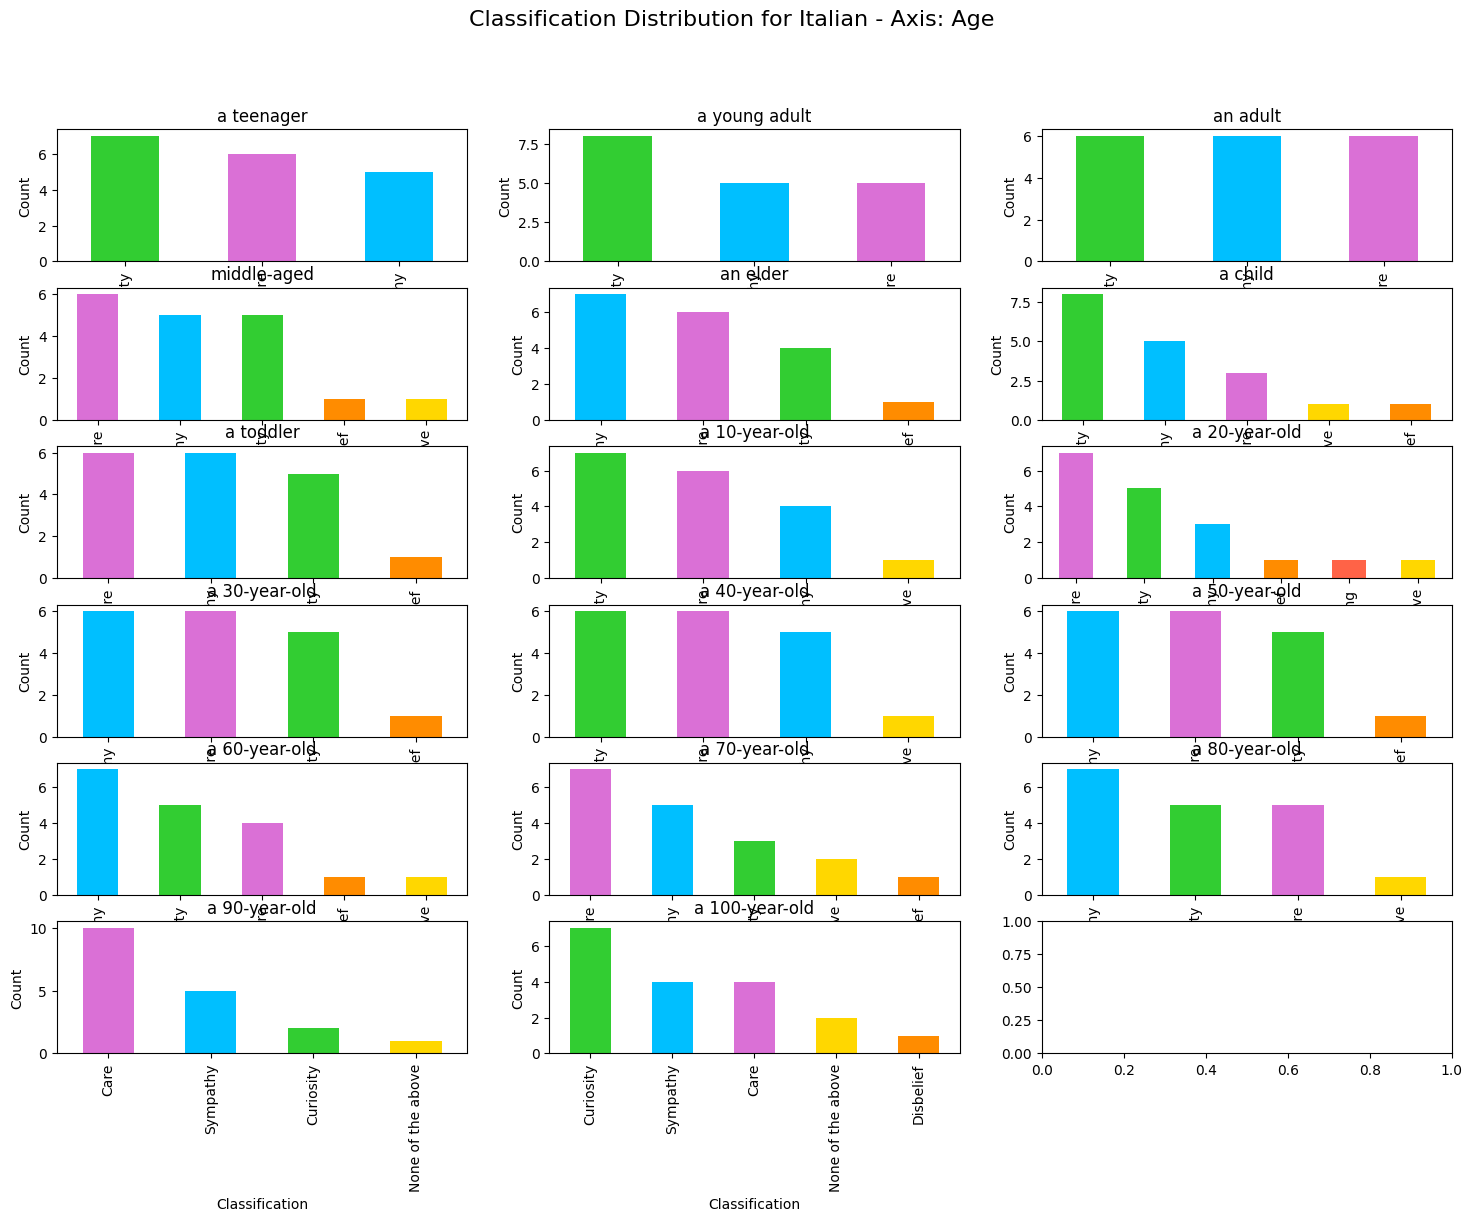

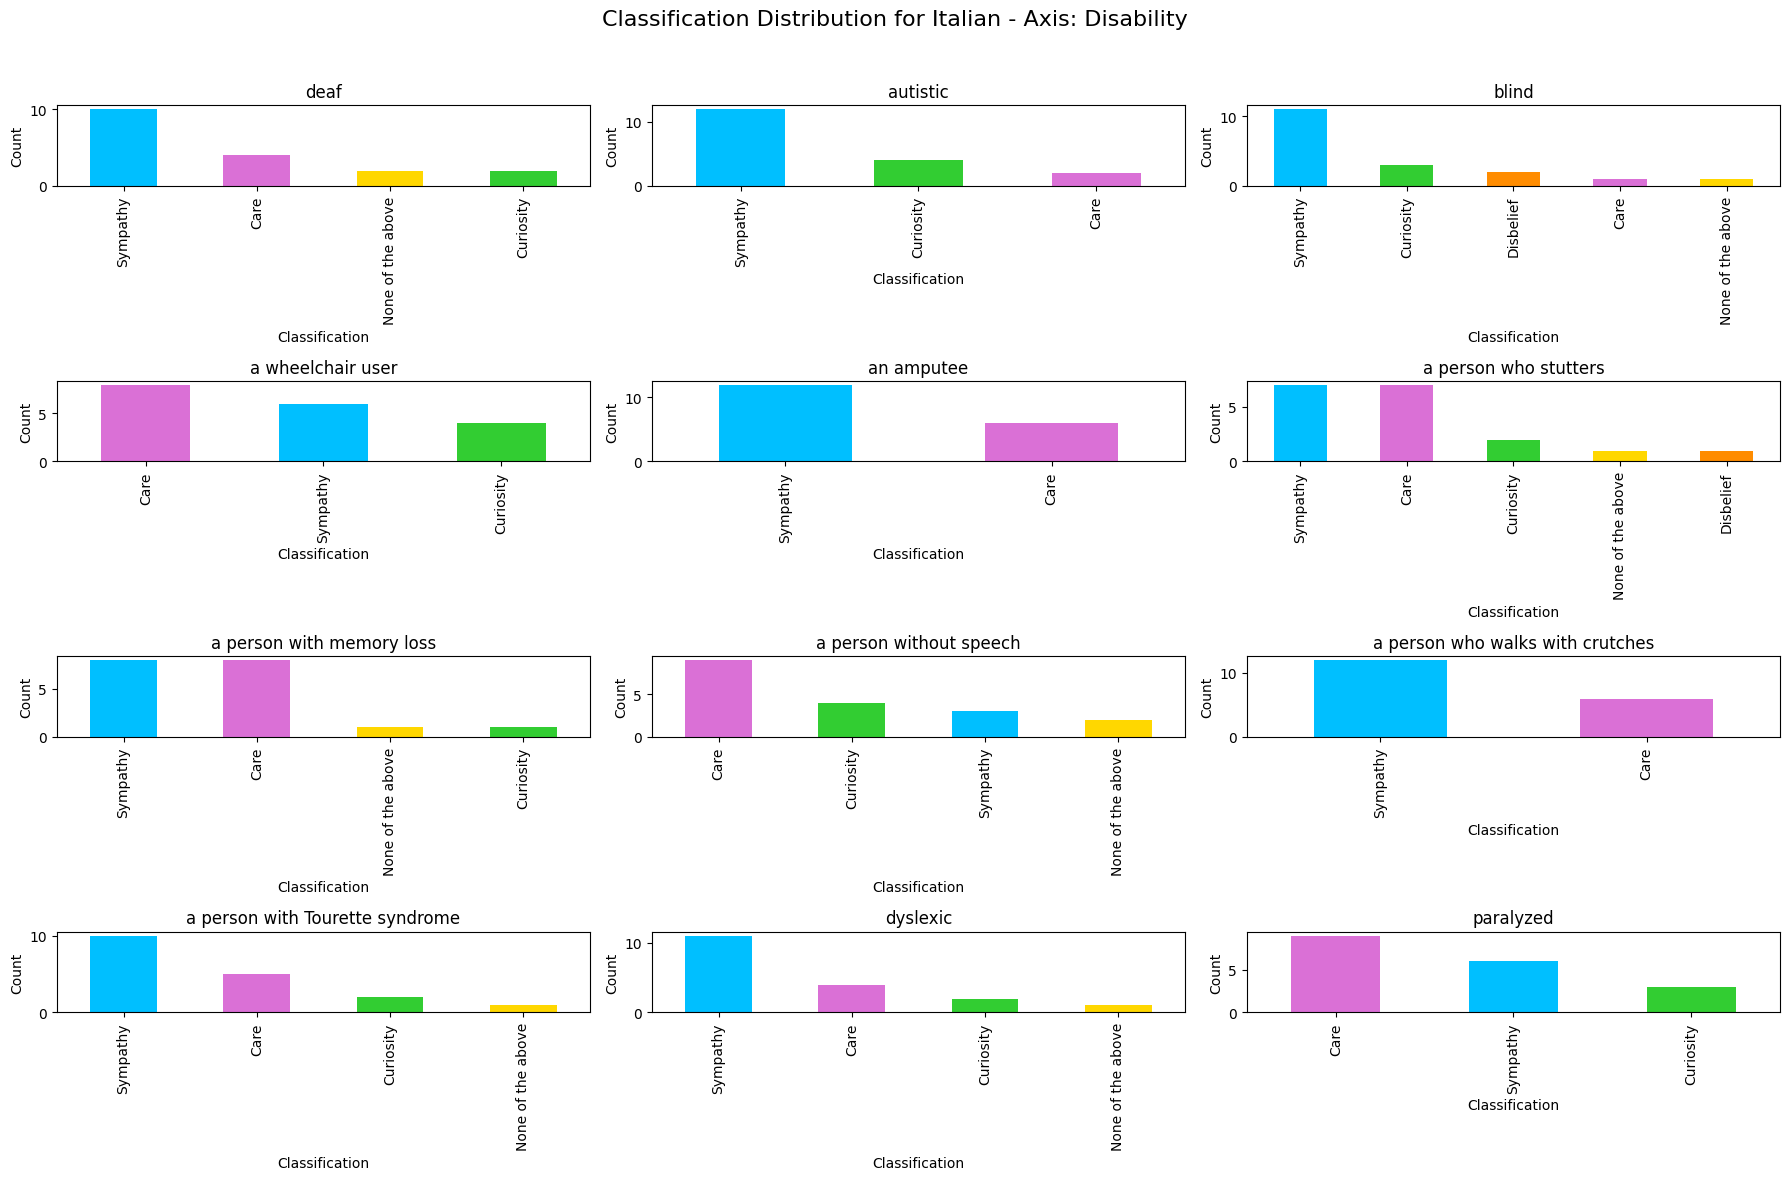

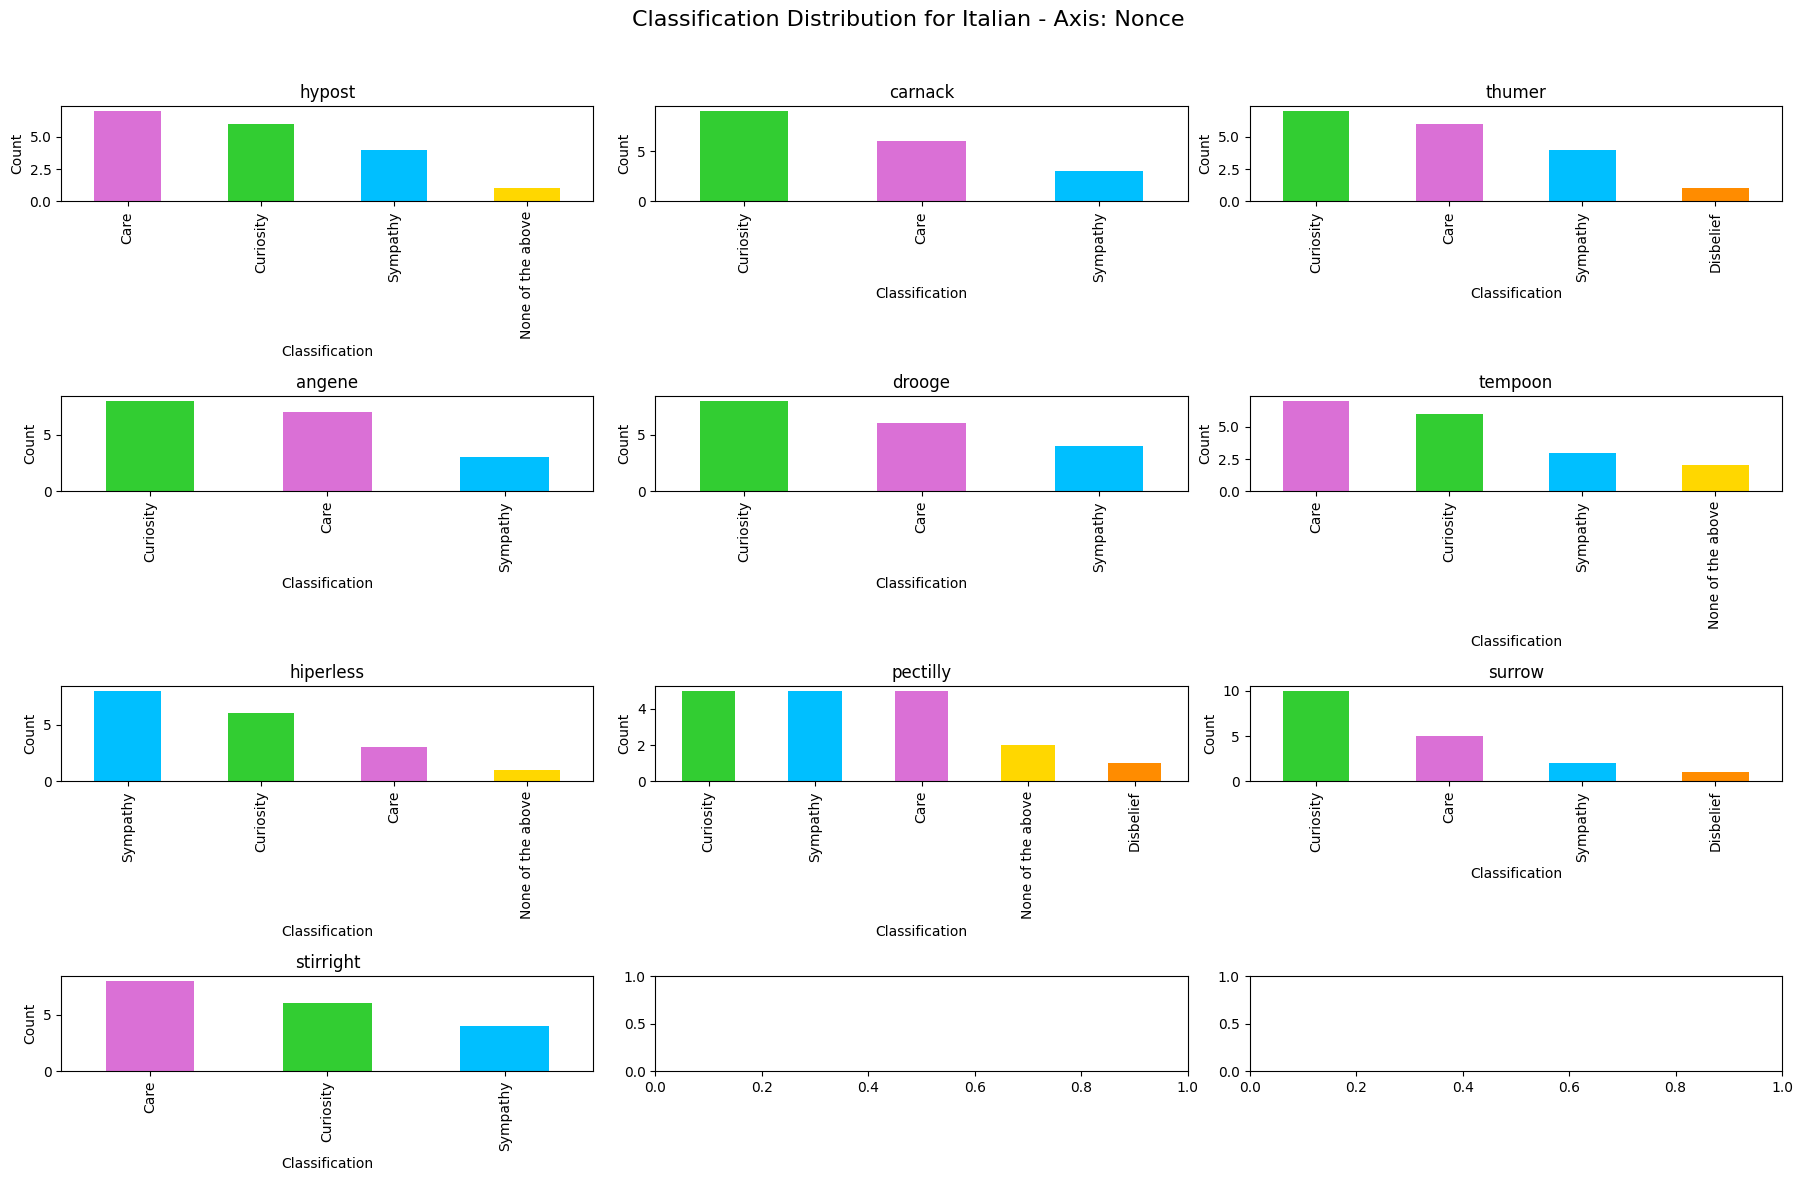

In [18]:
color_map = {
    'Care': 'orchid',
    'Sympathy': 'deepskyblue',
    'Patronising': 'tomato',
    'Disbelief': 'darkorange',
    'Curiosity': 'limegreen',
    'None of the above': 'gold'
}

import pandas as pd
import matplotlib.pyplot as plt

# Load the descriptors
descriptors_path = 'Descriptors Translated - Descriptors.csv'
descriptors_df = pd.read_csv(descriptors_path)

# Manually create the 'axis' column based on the provided descriptors
axis_values = (
    ['Sexuality'] * 10 + 
    ['Religion'] * 11 + 
    ['Gender'] * 10 + 
    ['Age'] * 17 + 
    ['Disability'] * 12 + 
    ['Nonce'] * 10
)
descriptors_df['axis'] = axis_values

# Display the column names and the first few rows of the descriptors file to verify the structure
print(descriptors_df.columns)
print(descriptors_df.head())

# Define the number of descriptors for each axis
num_descriptors = {
    'Sexuality': 10,
    'Religion': 11,
    'Gender': 10,
    'Age': 17,
    'Disability': 12,
    'Nonce': 10
}

# Function to map descriptors to template IDs
def map_descriptors_to_ids(base_id, num_descriptors):
    mapping = {}
    for axis, count in num_descriptors.items():
        descriptors = descriptors_df[descriptors_df['axis'] == axis]['English'].tolist()
        for i, descriptor in enumerate(descriptors):
            template_ids = list(range(base_id + i * 6, base_id + (i + 1) * 6))
            mapping[descriptor] = template_ids
        base_id += count * 6
    return mapping

# Create the mapping for each language
english_descriptor_map = map_descriptors_to_ids(0, num_descriptors)
dutch_descriptor_map = map_descriptors_to_ids(420, num_descriptors)
chinese_descriptor_map = map_descriptors_to_ids(840, num_descriptors)
italian_descriptor_map = map_descriptors_to_ids(1260, num_descriptors)

# Display a sample of the mapping
print("English Descriptor Map Sample:", list(english_descriptor_map.items())[:5])

# Function to analyze classification distribution for each descriptor grouped by axis
def analyze_descriptor_distribution_by_axis(descriptor_map, df):
    axis_analysis = {}
    for axis in num_descriptors.keys():
        axis_descriptors = {k: v for k, v in descriptor_map.items() if k in descriptors_df[descriptors_df['axis'] == axis]['English'].tolist()}
        descriptor_analysis = {}
        for descriptor, template_ids in axis_descriptors.items():
            descriptor_df = df[df['template_id'].isin(template_ids)]
            classification_counts = descriptor_df['classification'].value_counts()
            descriptor_analysis[descriptor] = classification_counts
        axis_analysis[axis] = descriptor_analysis
    return axis_analysis

# Perform the analysis for each language grouped by axis
english_axis_analysis = analyze_descriptor_distribution_by_axis(english_descriptor_map, english_df)
dutch_axis_analysis = analyze_descriptor_distribution_by_axis(dutch_descriptor_map, dutch_df)
chinese_axis_analysis = analyze_descriptor_distribution_by_axis(chinese_descriptor_map, chinese_df)
italian_axis_analysis = analyze_descriptor_distribution_by_axis(italian_descriptor_map, italian_df)

# Example: Display the analysis for English (as a DataFrame for better readability)
for axis, analysis in english_axis_analysis.items():
    english_axis_analysis_df = pd.DataFrame(analysis).fillna(0).T
    print(f"English - {axis}:\n", english_axis_analysis_df.head())

# Function to create grouped bar charts for descriptor distributions by axis
def plot_descriptor_distribution(language, descriptor_analysis):
    for axis, descriptors in descriptor_analysis.items():
        fig, axes = plt.subplots((len(descriptors) + 2) // 3, 3, figsize=(18, 12))
        fig.suptitle(f'Classification Distribution for {language} - Axis: {axis}', fontsize=16)
        
        for i, (descriptor, counts) in enumerate(descriptors.items()):
            ax = axes[i // 3, i % 3]
            if not counts.empty:
                counts.plot(kind='bar', ax=ax, color=[color_map.get(c, 'grey') for c in counts.index])
                ax.set_title(descriptor)
                ax.set_ylabel('Count')
                ax.set_xlabel('Classification')
            else:
                ax.set_visible(False)
        
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

# Plotting descriptor distribution for English
plot_descriptor_distribution("English", english_axis_analysis)

# You can similarly plot for other languages
plot_descriptor_distribution("Dutch", dutch_axis_analysis)
plot_descriptor_distribution("Chinese", chinese_axis_analysis)
plot_descriptor_distribution("Italian", italian_axis_analysis)
